#Preprocessing and libraries

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [3]:
##--------------Prep-----------------
#df = pd.read_csv('/content/SM_to_dons_incl_cmpgn.csv')
#Removing outlier
#df = df.drop([0])
#covid_local = pd.read_csv('/content/catalunya_diari_covid.csv')

#df = df.join(covid_local['Sum of INGRESSATS_CRITIC'])

In [4]:
#Filling null values with 0
#df = df.fillna(0)

In [5]:
#Saving for further exploratory analysis
#df.to_excel('/content/SM_to_dons_cov.xlsx')

In [6]:
##-----------Checkpoint-------------------------
df = pd.read_excel('/Users/i.p.kruyt/Desktop/ESADE/BdA/Data_Sources/Donations/SM_to_dons_cov.xlsx')

In [7]:
#Value for 2020 
df = df[(df['date'] > '2019-12-31') & (df['date'] < '2020-12-31')]

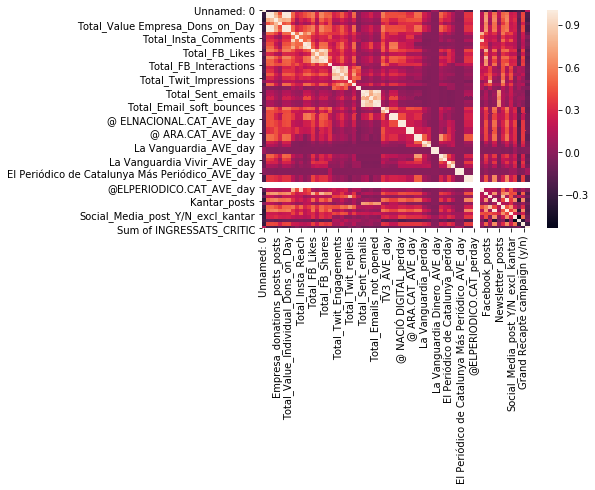

In [8]:
#Printing correlations
corrs= df.corr()
sns.heatmap(corrs)

In [9]:
#Defining dependent/target variables
#Splitting between empresas and individuals as different effect sizes
#of Social Media on them are expected
y_posts = df['Donations_posts']
y_values = df['Total_Value_Dons_on_Day']
y_indiv_posts = df['Individuals_donations_posts_posts']
y_indiv_value = df['Total_Value_Individual_Dons_on_Day']
y_emp_posts = df['Empresa_donations_posts_posts']
y_emp_value = df['Total_Value Empresa_Dons_on_Day']

#Regression donations to all available variables

In [10]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'date',
 'Donations_posts',
 'Total_Value_Dons_on_Day',
 'Empresa_donations_posts_posts',
 'Total_Value Empresa_Dons_on_Day',
 'Individuals_donations_posts_posts',
 'Total_Value_Individual_Dons_on_Day',
 'Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',

In [11]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_posts, X).fit()
model1.summary()


/Users/i.p.kruyt/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     26.59
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.20e-85
Time:                        18:01:09   Log-Likelihood:                -2498.2
No. Observations:                 373   AIC:                             5092.
Df Residuals:                     325   BIC:                             5281.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              58.5476     26.221      2.233      0.026       6.963     110.132
Total_Insta_Likes                                   2.5623      1.094      2.342      0.020       0.410       4.715
Total_Insta_Comments                              -11.0834      7.036     -1.575      0.116     -24.926       2.759
Total_Insta_Reach                                   0.3549      0.177      2.003      0.046       0.006       0.703
Total_Insta_Follows                                50.6967     34.710      1.461      0.145     -17.589     118.982
Total_Insta_Interactions                           -3.3898      4.325     -0.784      0.434     -11.898       5.118
Total_FB_Likes                                      0.7977      1.068      0.747      0.456      -1.304       2.899
Total_FB_Comments                                  20.7174     16.982      1.220      0.223     -12.691      54.126
Total_FB_Reach                                     -0.0201      0.054     -0.373      0.709      -0.126       0.086
Total_FB_Shares                                    -5.6679      3.476     -1.631      0.104     -12.506       1.170
Total_FB_Interactions                              -0.8333      0.852     -0.978      0.329      -2.509       0.843
Total_Twit_Likes                                   -0.1123      4.796     -0.023      0.981      -9.547       9.323
Total_Twit_Engagements                              0.0119      0.731      0.016      0.987      -1.427       1.451
Total_Twit_Retweets                                 6.1049      5.070      1.204      0.229      -3.870      16.080
Total_Twit_Impressions                              0.0021      0.016      0.133      0.894      -0.029       0.033
Total_Twit_replies                               -108.9672     29.689     -3.670      0.000    -167.375     -50.559
Total_Twit_clicks                                  25.2686      4.222      5.985      0.000      16.963      33.575
Total_Twit_hashclicks                             -49.5129     29.510     -1.678      0.094    -107.567       8.542
Total_Sent_emails                                   0.1450      0.446      0.325      0.745      -0.732       1.022
Total_Opened_Emails                                -0.1602      0.448     -0.358      0.721      -1.041       0.721
Total_Email_clicks                                  0.4202      0.151      2.783      0.006       0.123       0.717
Total_Emails_not_opened                            -0.1315      0.463     -0.284      0.776      -1.042       0.778
Total_Email_soft_bounces                           -0.7808      0.527     -1.481      0.140      -1.818       0.256
TV3_perday                                         43.3171     84.4

In [12]:
### Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_values, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.814
Model:                                 OLS   Adj. R-squared:                  0.787
Method:                      Least Squares   F-statistic:                     30.17
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.44e-92
Time:                             18:01:09   Log-Likelihood:                -4018.3
No. Observations:                      373   AIC:                             8133.
Df Residuals:                          325   BIC:                             8321.
Df Model:                               47                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            2987.2283   1543.742      1.935      0.054     -49.760    6024.217
Total_Insta_Likes                                 163.4746     64.422      2.538      0.012      36.739     290.210
Total_Insta_Comments                             -877.1618    414.255     -2.117      0.035   -1692.121     -62.203
Total_Insta_Reach                                  24.5797     10.431      2.357      0.019       4.060      45.100
Total_Insta_Follows                              3869.8757   2043.535      1.894      0.059    -150.351    7890.103
Total_Insta_Interactions                         -340.3519    254.608     -1.337      0.182    -841.240     160.536
Total_FB_Likes                                    -33.5197     62.885     -0.533      0.594    -157.234      90.194
Total_FB_Comments                                 551.3926    999.791      0.552      0.582   -1415.487    2518.272
Total_FB_Reach                                     -0.8147      3.165     -0.257      0.797      -7.041       5.412
Total_FB_Shares                                  -163.7569    204.630     -0.800      0.424    -566.324     238.810
Total_FB_Interactions                             -56.4740     50.157     -1.126      0.261    -155.148      42.200
Total_Twit_Likes                                 -289.4803    282.361     -1.025      0.306    -844.966     266.005
Total_Twit_Engagements                              7.8060     43.053      0.181      0.856     -76.891      92.503
Total_Twit_Retweets                               540.1409    298.513      1.809      0.071     -47.120    1127.402
Total_Twit_Impressions                              1.0049      0.921      1.092      0.276      -0.806       2.816
Total_Twit_replies                              -6015.2761   1747.932     -3.441      0.001   -9453.965   -2576.588
Total_Twit_clicks                                1285.3098    248.568      5.171      0.000     796.304    1774.316
Total_Twit_hashclicks                           -2765.2374   1737.357     -1.592      0.112   -6183.123     652.648
Total_Sent_emails                                  -0.6397     26.241     -0.024      0.981     -52.264      50.985
Total_Opened_Emails                                -0.0993     26.362     -0.004      0.997     -51.961      51.762
Total_Email_clicks                                 28.7469      8.889      3.234      0.001      11.259      46.235
Total_Emails_not_opened                             2.0624     27.234      0.076      0.940     -51.514      55.639
Total_Email_soft_bounces                          -56.6040     31.040     -1.824      0.069    -117.669       4.461
TV3_perday  

In [13]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_indiv_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.793
Model:                                           OLS   Adj. R-squared:                  0.763
Method:                                Least Squares   F-statistic:                     26.51
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           1.77e-85
Time:                                       18:01:09   Log-Likelihood:                -2496.0
No. Observations:                                373   AIC:                             5088.
Df Residuals:                                    325   BIC:                             5276.
Df Model:                                         47                                         
Covariance Type:                           nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              57.3787     26.068      2.201      0.028       6.096     108.661
Total_Insta_Likes                                   2.5301      1.088      2.326      0.021       0.390       4.670
Total_Insta_Comments                              -10.8788      6.995     -1.555      0.121     -24.640       2.883
Total_Insta_Reach                                   0.3475      0.176      1.973      0.049       0.001       0.694
Total_Insta_Follows                                50.0537     34.507      1.451      0.148     -17.832     117.939
Total_Insta_Interactions                           -3.2374      4.299     -0.753      0.452     -11.695       5.221
Total_FB_Likes                                      0.8126      1.062      0.765      0.445      -1.276       2.902
Total_FB_Comments                                  21.2767     16.883      1.260      0.208     -11.936      54.489
Total_FB_Reach                                     -0.0199      0.053     -0.372      0.710      -0.125       0.085
Total_FB_Shares                                    -5.7404      3.455     -1.661      0.098     -12.538       1.057
Total_FB_Interactions                              -0.8049      0.847     -0.950      0.343      -2.471       0.861
Total_Twit_Likes                                   -0.0547      4.768     -0.011      0.991      -9.435       9.325
Total_Twit_Engagements                              0.0112      0.727      0.015      0.988      -1.419       1.441
Total_Twit_Retweets                                 6.0024      5.041      1.191      0.235      -3.914      15.919
Total_Twit_Impressions                              0.0019      0.016      0.122      0.903      -0.029       0.032
Total_Twit_replies                               -108.4916     29.516     -3.676      0.000    -166.557     -50.426
Total_Twit_clicks                                  25.2435      4.197      6.014      0.000      16.986      33.501
Total_Twit_hashclicks                             -49.1100     29.337     -1.674      0.095    -106.825       8.604
Total_Sent_emails                                   0.1378      0.443      0.311      0.756      -0.734       1.009
Total_Opened_Emails                                -0.1528      0.445     -0.343      0.732      -1.029       0.723
Total_Email_clicks                                  0.4145      0.150      2.761      0.006       0.119       0.710
Total_Emails_not_opened                            -0.1244      0.460     -0.270      0.787      -1.029       0.780
Total_Email_soft_b

In [14]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_indiv_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.806
Model:                                            OLS   Adj. R-squared:                  0.778
Method:                                 Least Squares   F-statistic:                     28.81
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           5.05e-90
Time:                                        18:01:09   Log-Likelihood:                -4003.5
No. Observations:                                 373   AIC:                             8103.
Df Residuals:                                     325   BIC:                             8291.
Df Model:                                          47                                         
Covariance Type:                            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            2656.4244   1483.878      1.790      0.074    -262.794    5575.643
Total_Insta_Likes                                 165.2630     61.923      2.669      0.008      43.442     287.084
Total_Insta_Comments                             -794.7484    398.190     -1.996      0.047   -1578.105     -11.392
Total_Insta_Reach                                  21.3124     10.026      2.126      0.034       1.588      41.037
Total_Insta_Follows                              3609.5965   1964.290      1.838      0.067    -254.732    7473.925
Total_Insta_Interactions                         -278.2826    244.735     -1.137      0.256    -759.747     203.182
Total_FB_Likes                                     10.1386     60.447      0.168      0.867    -108.778     129.055
Total_FB_Comments                                 717.7728    961.021      0.747      0.456   -1172.834    2608.379
Total_FB_Reach                                     -1.6205      3.042     -0.533      0.595      -7.606       4.364
Total_FB_Shares                                  -179.4616    196.695     -0.912      0.362    -566.418     207.495
Total_FB_Interactions                             -44.6299     48.212     -0.926      0.355    -139.478      50.218
Total_Twit_Likes                                 -181.9060    271.411     -0.670      0.503    -715.851     352.039
Total_Twit_Engagements                              4.3429     41.383      0.105      0.916     -77.070      85.755
Total_Twit_Retweets                               455.1656    286.937      1.586      0.114    -109.322    1019.653
Total_Twit_Impressions                              0.7116      0.885      0.804      0.422      -1.029       2.452
Total_Twit_replies                              -5812.3121   1680.149     -3.459      0.001   -9117.653   -2506.971
Total_Twit_clicks                                1348.4347    238.929      5.644      0.000     878.392    1818.478
Total_Twit_hashclicks                           -2709.4630   1669.985     -1.622      0.106   -5994.808     575.882
Total_Sent_emails                                  -1.8369     25.224     -0.073      0.942     -51.459      47.785
Total_Opened_Emails                                 1.2009     25.340      0.047      0.962     -48.650      51.052
Total_Email_clicks                                 24.8669      8.545      2.910      0.004       8.057      41.677
Total_Emails_not_opened                             3.1538     26.177      0.120      0.904     -48.345      54.653
Total_E

In [15]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_emp_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.731
Model:                                       OLS   Adj. R-squared:                  0.692
Method:                            Least Squares   F-statistic:                     18.76
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.15e-67
Time:                                   18:01:10   Log-Likelihood:                -809.96
No. Observations:                            373   AIC:                             1716.
Df Residuals:                                325   BIC:                             1904.
Df Model:                                     47                                         
Covariance Type:                       nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               1.1689      0.284      4.118      0.000       0.611       1.727
Total_Insta_Likes                                   0.0322      0.012      2.721      0.007       0.009       0.056
Total_Insta_Comments                               -0.2046      0.076     -2.686      0.008      -0.354      -0.055
Total_Insta_Reach                                   0.0075      0.002      3.906      0.000       0.004       0.011
Total_Insta_Follows                                 0.6430      0.376      1.712      0.088      -0.096       1.382
Total_Insta_Interactions                           -0.1524      0.047     -3.256      0.001      -0.244      -0.060
Total_FB_Likes                                     -0.0150      0.012     -1.295      0.196      -0.038       0.008
Total_FB_Comments                                  -0.5593      0.184     -3.043      0.003      -0.921      -0.198
Total_FB_Reach                                     -0.0002      0.001     -0.310      0.757      -0.001       0.001
Total_FB_Shares                                     0.0725      0.038      1.928      0.055      -0.001       0.147
Total_FB_Interactions                              -0.0284      0.009     -3.079      0.002      -0.047      -0.010
Total_Twit_Likes                                   -0.0576      0.052     -1.110      0.268      -0.160       0.045
Total_Twit_Engagements                              0.0007      0.008      0.088      0.930      -0.015       0.016
Total_Twit_Retweets                                 0.1025      0.055      1.868      0.063      -0.005       0.210
Total_Twit_Impressions                              0.0002      0.000      1.097      0.273      -0.000       0.001
Total_Twit_replies                                 -0.4756      0.321     -1.480      0.140      -1.108       0.157
Total_Twit_clicks                                   0.0251      0.046      0.550      0.583      -0.065       0.115
Total_Twit_hashclicks                              -0.4028      0.319     -1.261      0.208      -1.031       0.226
Total_Sent_emails                                   0.0073      0.005      1.506      0.133      -0.002       0.017
Total_Opened_Emails                                -0.0074      0.005     -1.517      0.130      -0.017       0.002
Total_Email_clicks                                  0.0058      0.002      3.526      0.000       0.003       0.009
Total_Emails_not_opened                            -0.0072      0.005     -1.436      0.152      -0.017       0.003
Total_Email_soft_bounces                           -0.0165    

In [16]:
#Trying regression with all available values
X = sm.add_constant(df[['Total_Insta_Likes',
 'Total_Insta_Comments',
 'Total_Insta_Reach',
 'Total_Insta_Follows',
 'Total_Insta_Interactions',
 'Total_FB_Likes',
 'Total_FB_Comments',
 'Total_FB_Reach',
 'Total_FB_Shares',
 'Total_FB_Interactions',
 'Total_Twit_Likes',
 'Total_Twit_Engagements',
 'Total_Twit_Retweets',
 'Total_Twit_Impressions',
 'Total_Twit_replies',
 'Total_Twit_clicks',
 'Total_Twit_hashclicks',
 'Total_Sent_emails',
 'Total_Opened_Emails',
 'Total_Email_clicks',
 'Total_Emails_not_opened',
 'Total_Email_soft_bounces',
 'TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day',
 'Instagram_posts',
 'Facebook_posts',
 'Twitter_posts',
 'Kantar_posts',
 'Newsletter_posts',
 'total_social_media_posts_on_day_excl_kantar',
 'total_social_media_posts_on_day_incl_kantar',
 'Social_Media_post_Y/N_excl_kantar',
 'Social_Media_post_Y/N_incl_kantar',
 'Dona Aliments campaign (y/n)',
 'Grand Recapte campaign (y/n)',
 'Sum of INGRESSATS_CRITIC']])

model1 = sm.OLS(y_emp_value, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.664
Model:                                         OLS   Adj. R-squared:                  0.616
Method:                              Least Squares   F-statistic:                     13.68
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           4.97e-53
Time:                                     18:01:10   Log-Likelihood:                -3284.2
No. Observations:                              373   AIC:                             6664.
Df Residuals:                                  325   BIC:                             6853.
Df Model:                                       47                                         
Covariance Type:                         nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             330.8039    215.730      1.533      0.126     -93.599     755.207
Total_Insta_Likes                                  -1.7884      9.003     -0.199      0.843     -19.499      15.922
Total_Insta_Comments                              -82.4134     57.890     -1.424      0.156    -196.300      31.473
Total_Insta_Reach                                   3.2673      1.458      2.242      0.026       0.400       6.135
Total_Insta_Follows                               260.2791    285.573      0.911      0.363    -301.526     822.084
Total_Insta_Interactions                          -62.0692     35.580     -1.744      0.082    -132.066       7.927
Total_FB_Likes                                    -43.6583      8.788     -4.968      0.000     -60.947     -26.370
Total_FB_Comments                                -166.3802    139.715     -1.191      0.235    -441.241     108.481
Total_FB_Reach                                      0.8058      0.442      1.822      0.069      -0.064       1.676
Total_FB_Shares                                    15.7046     28.596      0.549      0.583     -40.552      71.961
Total_FB_Interactions                             -11.8441      7.009     -1.690      0.092     -25.633       1.945
Total_Twit_Likes                                 -107.5742     39.458     -2.726      0.007    -185.200     -29.948
Total_Twit_Engagements                              3.4632      6.016      0.576      0.565      -8.373      15.299
Total_Twit_Retweets                                84.9753     41.716      2.037      0.042       2.909     167.042
Total_Twit_Impressions                              0.2933      0.129      2.280      0.023       0.040       0.546
Total_Twit_replies                               -202.9640    244.264     -0.831      0.407    -683.502     277.574
Total_Twit_clicks                                 -63.1249     34.736     -1.817      0.070    -131.461       5.211
Total_Twit_hashclicks                             -55.7745    242.786     -0.230      0.818    -533.406     421.857
Total_Sent_emails                                   1.1971      3.667      0.326      0.744      -6.017       8.411
Total_Opened_Emails                                -1.3002      3.684     -0.353      0.724      -8.548       5.947
Total_Email_clicks                                  3.8800      1.242      3.123      0.002       1.436       6.324
Total_Emails_not_opened                            -1.0913      3.806     -0.287      0.774      -8.578       6.396
Total_Email_soft_bounces                

# Relation To Donations

##All Social Media

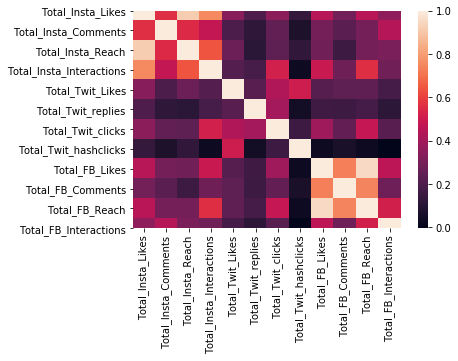

In [17]:
corrs = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']].corr()

sns.heatmap(corrs)

In [18]:
#First simple model
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     44.68
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.77e-64
Time:                        18:01:10   Log-Likelihood:                -2622.4
No. Observations:                 373   AIC:                             5271.
Df Residuals:                     360   BIC:                             5322.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       41.5429     15.979      2.600      0.010      10.119      72.967
Total_Insta_Likes            7.7502      1.048      7.395      0.000       5.689       9.811
Total_Insta_Comments        -9.9372      6.817     -1.458      0.146     -23.342       3.468
Total_Insta_Reach           -0.4661      0.083     -5.592      0.000      -0.630      -0.302
Total_Insta_Interactions    -2.9933      1.753     -1.708      0.089      -6.440       0.453
Total_Twit_Likes             1.6257      1.925      0.845      0.399      -2.159       5.410
Total_Twit_replies         -53.2688     18.008     -2.958      0.003     -88.682     -17.855
Total_Twit_clicks           31.0086      4.680      6.625      0.000      21.804      40.213
Total_Twit_hashclicks      -95.4205     37.027     -2.577      0.010    -168.237     -22.604
Total_FB_Likes               3.5492      1.211      2.932      0.004       1.168       5.930
Total_FB_Comments          -52.3602     11.650     -4.494      0.000     -75.271     -29.450
Total_FB_Reach               0.0243      0.043      0.571      0.568      -0.059       0.108
Total_FB_Interactions        3.2189      0.734      4.386      0.000       1.776       4.662
==============================================================================
Omnibus:                      466.183   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84390.442
Skew:                           5.485   Prob(JB):                         0.00
Kurtosis:                      75.867   Cond. No.                     3.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

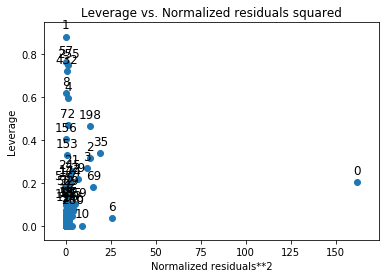

In [19]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [20]:
#Removing outliers
df_sm = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']].drop([0,2,3,6,10,69,359])
y_posts_sm = y_posts.drop([0,2,3,6,10,69,359])
y_values_sm = y_values.drop([0,2,3,6,10,69,359])
y_indiv_p_sm = y_indiv_posts.drop([0,2,3,6,10,69,359])
y_indiv_v_sm = y_indiv_value.drop([0,2,3,6,10,69,359])
y_emp_p_sm = y_emp_posts.drop([0,2,3,6,10,69,359])
y_emp_v_sm = y_emp_value.drop([0,2,3,6,10,69,359])

In [21]:
#General Posts counts
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_posts_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     144.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          3.28e-128
Time:                        18:01:11   Log-Likelihood:                -2252.9
No. Observations:                 366   AIC:                             4532.
Df Residuals:                     353   BIC:                             4583.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       57.5997      6.710      8.585      0.000      44.404      70.796
Total_Insta_Likes            7.0249      0.496     14.151      0.000       6.049       8.001
Total_Insta_Comments        -1.2031      3.014     -0.399      0.690      -7.131       4.724
Total_Insta_Reach           -0.5543      0.037    -14.795      0.000      -0.628      -0.481
Total_Insta_Interactions     5.6094      0.779      7.202      0.000       4.078       7.141
Total_Twit_Likes             1.4846      0.808      1.838      0.067      -0.104       3.073
Total_Twit_replies          -5.1106      7.685     -0.665      0.506     -20.224      10.003
Total_Twit_clicks            4.7252      2.093      2.258      0.025       0.609       8.842
Total_Twit_hashclicks      -43.8222     15.513     -2.825      0.005     -74.332     -13.312
Total_FB_Likes               1.0777      0.540      1.995      0.047       0.015       2.140
Total_FB_Comments          -13.0821      4.986     -2.624      0.009     -22.888      -3.276
Total_FB_Reach               0.0030      0.018      0.166      0.868      -0.033       0.039
Total_FB_Interactions        3.0198      0.380      7.944      0.000       2.272       3.767
==============================================================================
Omnibus:                      145.951   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2025.351
Skew:                           1.269   Prob(JB):                         0.00
Kurtosis:                      14.241   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#General Values
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_values_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.788
Model:                                 OLS   Adj. R-squared:                  0.781
Method:                      Least Squares   F-statistic:                     109.6
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):          4.22e-111
Time:                             18:01:11   Log-Likelihood:                -3812.0
No. Observations:                      366   AIC:                             7650.
Df Residuals:                          353   BIC:                             7701.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3605.7793    475.046      7.590      0.000    2671.502    4540.056
Total_Insta_Likes          437.5709     35.148     12.449      0.000     368.446     506.696
Total_Insta_Comments      -154.4593    213.388     -0.724      0.470    -574.132     265.213
Total_Insta_Reach          -33.4134      2.653    -12.596      0.000     -38.630     -28.196
Total_Insta_Interactions   288.5303     55.140      5.233      0.000     180.085     396.975
Total_Twit_Likes            69.5734     57.191      1.217      0.225     -42.905     182.051
Total_Twit_replies        -267.5483    544.077     -0.492      0.623   -1337.588     802.492
Total_Twit_clicks          239.6840    148.187      1.617      0.107     -51.757     531.125
Total_Twit_hashclicks    -2415.7311   1098.350     -2.199      0.028   -4575.863    -255.599
Total_FB_Likes              61.3013     38.243      1.603      0.110     -13.912     136.514
Total_FB_Comments        -1522.6749    353.002     -4.313      0.000   -2216.927    -828.423
Total_FB_Reach               2.1499      1.293      1.662      0.097      -0.394       4.693
Total_FB_Interactions      151.0245     26.913      5.612      0.000      98.094     203.955
==============================================================================
Omnibus:                      250.523   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7816.349
Skew:                           2.372   Prob(JB):                         0.00
Kurtosis:                      25.137   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Individual Posts counts
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_indiv_p_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.833
Model:                                           OLS   Adj. R-squared:                  0.828
Method:                                Least Squares   F-statistic:                     147.1
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):          2.80e-129
Time:                                       18:01:11   Log-Likelihood:                -2247.5
No. Observations:                                366   AIC:                             4521.
Df Residuals:                                    353   BIC:                             4572.
Df Model:                                         12                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       56.5564      6.611      8.555      0.000      43.554      69.559
Total_Insta_Likes            6.9527      0.489     14.214      0.000       5.991       7.915
Total_Insta_Comments        -1.0809      2.970     -0.364      0.716      -6.922       4.760
Total_Insta_Reach           -0.5505      0.037    -14.911      0.000      -0.623      -0.478
Total_Insta_Interactions     5.6635      0.767      7.380      0.000       4.154       7.173
Total_Twit_Likes             1.4811      0.796      1.861      0.064      -0.084       3.046
Total_Twit_replies          -5.1579      7.572     -0.681      0.496     -20.050       9.734
Total_Twit_clicks            4.7851      2.062      2.320      0.021       0.729       8.841
Total_Twit_hashclicks      -43.4958     15.286     -2.845      0.005     -73.559     -13.433
Total_FB_Likes               1.0598      0.532      1.991      0.047       0.013       2.107
Total_FB_Comments          -12.2767      4.913     -2.499      0.013     -21.939      -2.615
Total_FB_Reach               0.0018      0.018      0.098      0.922      -0.034       0.037
Total_FB_Interactions        3.0098      0.375      8.036      0.000       2.273       3.746
==============================================================================
Omnibus:                      139.123   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1846.516
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                      13.738   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Individual Values 
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_indiv_v_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.812
Model:                                            OLS   Adj. R-squared:                  0.805
Method:                                 Least Squares   F-statistic:                     126.7
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):          6.28e-120
Time:                                        18:01:11   Log-Likelihood:                -3772.1
No. Observations:                                 366   AIC:                             7570.
Df Residuals:                                     353   BIC:                             7621.
Df Model:                                          12                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3244.1301    425.918      7.617      0.000    2406.474    4081.786
Total_Insta_Likes          416.1102     31.513     13.204      0.000     354.134     478.087
Total_Insta_Comments      -119.7028    191.320     -0.626      0.532    -495.974     256.568
Total_Insta_Reach          -32.6117      2.378    -13.712      0.000     -37.289     -27.934
Total_Insta_Interactions   326.6322     49.438      6.607      0.000     229.402     423.862
Total_Twit_Likes            70.4837     51.276      1.375      0.170     -30.362     171.330
Total_Twit_replies        -320.1948    487.810     -0.656      0.512   -1279.574     639.184
Total_Twit_clicks          292.2388    132.862      2.200      0.028      30.938     553.539
Total_Twit_hashclicks    -2256.4345    984.761     -2.291      0.023   -4193.170    -319.699
Total_FB_Likes              59.4125     34.288      1.733      0.084      -8.022     126.847
Total_FB_Comments        -1080.1136    316.496     -3.413      0.001   -1702.568    -457.659
Total_FB_Reach               1.0481      1.160      0.904      0.367      -1.232       3.328
Total_FB_Interactions      154.7408     24.130      6.413      0.000     107.284     202.197
==============================================================================
Omnibus:                      209.189   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4823.649
Skew:                           1.902   Prob(JB):                         0.00
Kurtosis:                      20.373   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Organizations Donations 
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_emp_p_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.383
Model:                                       OLS   Adj. R-squared:                  0.362
Method:                            Least Squares   F-statistic:                     18.29
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.15e-30
Time:                                   18:01:11   Log-Likelihood:                -866.12
No. Observations:                            366   AIC:                             1758.
Df Residuals:                                353   BIC:                             1809.
Df Model:                                     12                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0433      0.152      6.875      0.000       0.745       1.342
Total_Insta_Likes            0.0723      0.011      6.437      0.000       0.050       0.094
Total_Insta_Comments        -0.1222      0.068     -1.793      0.074      -0.256       0.012
Total_Insta_Reach           -0.0038      0.001     -4.520      0.000      -0.005      -0.002
Total_Insta_Interactions    -0.0541      0.018     -3.074      0.002      -0.089      -0.020
Total_Twit_Likes             0.0035      0.018      0.191      0.849      -0.032       0.039
Total_Twit_replies           0.0473      0.174      0.272      0.786      -0.295       0.389
Total_Twit_clicks           -0.0599      0.047     -1.266      0.206      -0.153       0.033
Total_Twit_hashclicks       -0.3264      0.351     -0.930      0.353      -1.016       0.364
Total_FB_Likes               0.0179      0.012      1.464      0.144      -0.006       0.042
Total_FB_Comments           -0.8054      0.113     -7.142      0.000      -1.027      -0.584
Total_FB_Reach               0.0013      0.000      3.097      0.002       0.000       0.002
Total_FB_Interactions        0.0099      0.009      1.156      0.249      -0.007       0.027
==============================================================================
Omnibus:                      397.274   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27133.687
Skew:                           4.609   Prob(JB):                         0.00
Kurtosis:                      44.162   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Organizations Values 
X = sm.add_constant(df_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions',
       'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks','Total_Twit_hashclicks','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_emp_v_sm, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.225
Model:                                         OLS   Adj. R-squared:                  0.198
Method:                              Least Squares   F-statistic:                     8.523
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           3.08e-14
Time:                                     18:01:11   Log-Likelihood:                -3245.3
No. Observations:                              366   AIC:                             6517.
Df Residuals:                                  353   BIC:                             6567.
Df Model:                                       12                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      361.6492    101.002      3.581      0.000     163.008     560.290
Total_Insta_Likes           21.4607      7.473      2.872      0.004       6.764      36.158
Total_Insta_Comments       -34.7565     45.370     -0.766      0.444    -123.985      54.472
Total_Insta_Reach           -0.8017      0.564     -1.422      0.156      -1.911       0.307
Total_Insta_Interactions   -38.1018     11.724     -3.250      0.001     -61.159     -15.045
Total_Twit_Likes            -0.9103     12.160     -0.075      0.940     -24.825      23.004
Total_Twit_replies          52.6464    115.679      0.455      0.649    -174.860     280.153
Total_Twit_clicks          -52.5548     31.507     -1.668      0.096    -114.519       9.410
Total_Twit_hashclicks     -159.2966    233.525     -0.682      0.496    -618.572     299.979
Total_FB_Likes               1.8888      8.131      0.232      0.816     -14.103      17.880
Total_FB_Comments         -442.5613     75.053     -5.897      0.000    -590.170    -294.953
Total_FB_Reach               1.1018      0.275      4.007      0.000       0.561       1.643
Total_FB_Interactions       -3.7162      5.722     -0.649      0.516     -14.970       7.538
==============================================================================
Omnibus:                      540.841   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121379.937
Skew:                           7.485   Prob(JB):                         0.00
Kurtosis:                      90.950   Cond. No.                     3.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Instagram

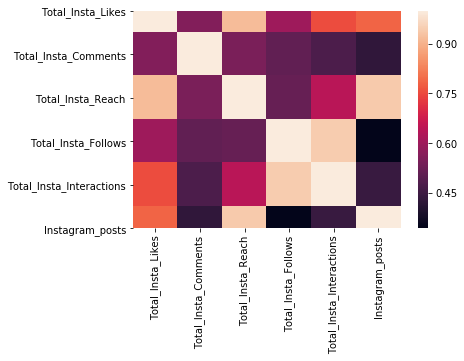

In [27]:
corrs = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach', 'Total_Insta_Follows',
       'Total_Insta_Interactions', 'Instagram_posts']].corr()

sns.heatmap(corrs)

In [28]:
#First simple model
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     55.49
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.36e-36
Time:                        18:01:12   Log-Likelihood:                -2704.4
No. Observations:                 373   AIC:                             5419.
Df Residuals:                     368   BIC:                             5439.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       91.9896     18.745      4.908      0.000      55.129     128.850
Total_Insta_Likes            9.5455      1.155      8.264      0.000       7.274      11.817
Total_Insta_Comments         3.3250      7.669      0.434      0.665     -11.756      18.406
Total_Insta_Reach           -0.6563      0.095     -6.907      0.000      -0.843      -0.469
Total_Insta_Interactions     5.0616      1.728      2.928      0.004       1.663       8.460
==============================================================================
Omnibus:                      625.548   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           254893.634
Skew:                           9.414   Prob(JB):                         0.00
Kurtosis:                     129.673   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

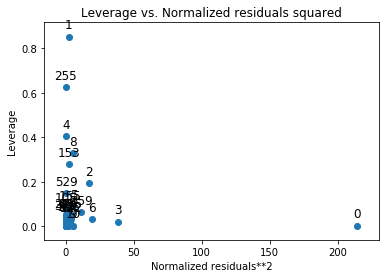

In [29]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [30]:
#Dropping outliers and redefining dependent variables 
df_insta_sm = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']].drop([0,3])
y_posts_insta = y_posts.drop([0,3])
y_values_insta = y_values.drop([0,3])
y_indiv_p_insta = y_indiv_posts.drop([0,3])
y_indiv_v_insta = y_indiv_value.drop([0,3])
y_emp_p_insta = y_emp_posts.drop([0,3])
y_emp_v_insta = y_emp_value.drop([0,3])

In [31]:
#-------Instagram--------
#General post counts
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_posts_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     176.0
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.67e-84
Time:                        18:01:12   Log-Likelihood:                -2478.5
No. Observations:                 371   AIC:                             4967.
Df Residuals:                     366   BIC:                             4987.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       75.1010     10.618      7.073      0.000      54.221      95.981
Total_Insta_Likes            9.5475      0.653     14.616      0.000       8.263      10.832
Total_Insta_Comments         6.3161      4.345      1.454      0.147      -2.229      14.861
Total_Insta_Reach           -0.6895      0.054    -12.797      0.000      -0.795      -0.584
Total_Insta_Interactions     5.5624      0.979      5.683      0.000       3.638       7.487
==============================================================================
Omnibus:                      269.446   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10185.166
Skew:                           2.534   Prob(JB):                         0.00
Kurtosis:                      28.163   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#General donation value
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_values_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.629
Model:                                 OLS   Adj. R-squared:                  0.625
Method:                      Least Squares   F-statistic:                     155.3
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.59e-77
Time:                             18:01:12   Log-Likelihood:                -4025.3
No. Observations:                      371   AIC:                             8061.
Df Residuals:                          366   BIC:                             8080.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4762.8634    686.688      6.936      0.000    3412.514    6113.213
Total_Insta_Likes          575.3291     42.244     13.619      0.000     492.257     658.401
Total_Insta_Comments       168.4047    281.023      0.599      0.549    -384.218     721.027
Total_Insta_Reach          -41.2185      3.485    -11.828      0.000     -48.071     -34.366
Total_Insta_Interactions   359.4135     63.294      5.678      0.000     234.948     483.879
==============================================================================
Omnibus:                      269.273   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8382.900
Skew:                           2.606   Prob(JB):                         0.00
Kurtosis:                      25.696   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Individual Donation count
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_indiv_p_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.660
Model:                                           OLS   Adj. R-squared:                  0.656
Method:                                Least Squares   F-statistic:                     177.4
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           2.64e-84
Time:                                       18:01:12   Log-Likelihood:                -2474.7
No. Observations:                                371   AIC:                             4959.
Df Residuals:                                    366   BIC:                             4979.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       73.8821     10.511      7.029      0.000      53.212      94.552
Total_Insta_Likes            9.4635      0.647     14.635      0.000       8.192      10.735
Total_Insta_Comments         6.4390      4.302      1.497      0.135      -2.020      14.898
Total_Insta_Reach           -0.6847      0.053    -12.836      0.000      -0.790      -0.580
Total_Insta_Interactions     5.5704      0.969      5.749      0.000       3.665       7.476
==============================================================================
Omnibus:                      270.299   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10405.375
Skew:                           2.540   Prob(JB):                         0.00
Kurtosis:                      28.442   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Individual Donation value
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_indiv_v_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.650
Model:                                            OLS   Adj. R-squared:                  0.646
Method:                                 Least Squares   F-statistic:                     169.6
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           5.40e-82
Time:                                        18:01:12   Log-Likelihood:                -3996.7
No. Observations:                                 371   AIC:                             8003.
Df Residuals:                                     366   BIC:                             8023.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4315.8282    635.831      6.788      0.000    3065.488    5566.168
Total_Insta_Likes          546.8655     39.116     13.981      0.000     469.946     623.785
Total_Insta_Comments       229.0958    260.210      0.880      0.379    -282.598     740.790
Total_Insta_Reach          -39.6914      3.227    -12.301      0.000     -46.037     -33.346
Total_Insta_Interactions   365.4019     58.606      6.235      0.000     250.154     480.649
==============================================================================
Omnibus:                      271.487   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9571.142
Skew:                           2.591   Prob(JB):                         0.00
Kurtosis:                      27.337   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Organization Donation count
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_emp_p_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.258
Model:                                       OLS   Adj. R-squared:                  0.250
Method:                            Least Squares   F-statistic:                     31.81
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           9.29e-23
Time:                                   18:01:12   Log-Likelihood:                -937.07
No. Observations:                            371   AIC:                             1884.
Df Residuals:                                366   BIC:                             1904.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2189      0.167      7.316      0.000       0.891       1.546
Total_Insta_Likes            0.0839      0.010      8.189      0.000       0.064       0.104
Total_Insta_Comments        -0.1229      0.068     -1.803      0.072      -0.257       0.011
Total_Insta_Reach           -0.0048      0.001     -5.700      0.000      -0.006      -0.003
Total_Insta_Interactions    -0.0080      0.015     -0.521      0.603      -0.038       0.022
==============================================================================
Omnibus:                      431.788   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38312.869
Skew:                           5.109   Prob(JB):                         0.00
Kurtosis:                      51.724   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Organization Donation value
X = sm.add_constant(df_insta_sm[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions']])
model2 = sm.OLS(y_emp_v_insta, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.087
Model:                                         OLS   Adj. R-squared:                  0.077
Method:                              Least Squares   F-statistic:                     8.684
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           1.05e-06
Time:                                     18:01:12   Log-Likelihood:                -3328.3
No. Observations:                              371   AIC:                             6667.
Df Residuals:                                  366   BIC:                             6686.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      447.0352    104.932      4.260      0.000     240.689     653.381
Total_Insta_Likes           28.4635      6.455      4.409      0.000      15.769      41.158
Total_Insta_Comments       -60.6910     42.943     -1.413      0.158    -145.137      23.755
Total_Insta_Reach           -1.5271      0.533     -2.868      0.004      -2.574      -0.480
Total_Insta_Interactions    -5.9883      9.672     -0.619      0.536     -25.008      13.031
==============================================================================
Omnibus:                      576.987   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142138.056
Skew:                           8.285   Prob(JB):                         0.00
Kurtosis:                      97.447   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Facebook

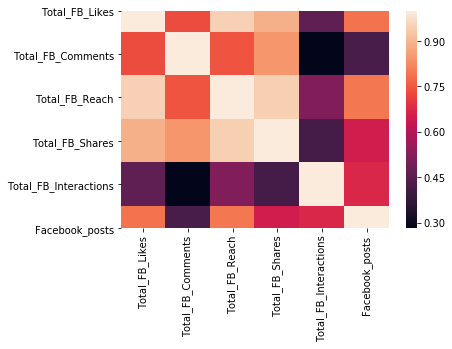

In [37]:
#Check for multicollinearity and deleting highly correlated variables
corrs = df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Shares', 'Total_FB_Interactions','Facebook_posts']].corr()

sns.heatmap(corrs)

In [38]:
#First simple model
X = sm.add_constant(df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     73.13
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.49e-45
Time:                        18:01:13   Log-Likelihood:                -2683.4
No. Observations:                 373   AIC:                             5377.
Df Residuals:                     368   BIC:                             5396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    60.2945     17.363      3.473      0.001      26.152      94.437
Total_FB_Likes            3.0910      1.315      2.351      0.019       0.505       5.677
Total_FB_Comments       -65.6811     12.469     -5.267      0.000     -90.201     -41.161
Total_FB_Reach            0.1411      0.041      3.430      0.001       0.060       0.222
Total_FB_Interactions     3.0704      0.752      4.082      0.000       1.591       4.549
==============================================================================
Omnibus:                      442.649   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64477.249
Skew:                           5.064   Prob(JB):                         0.00
Kurtosis:                      66.609   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

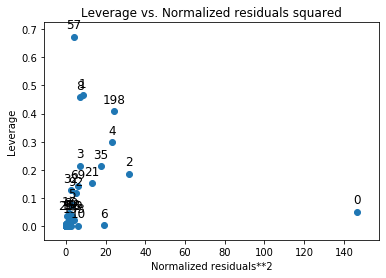

In [39]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [40]:
#Dropping outliers and redefining dependent variables 
df_fb = df[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']].drop([0,2,4, 6, 35, 5])

y_posts_fb = y_posts.drop([0,2,4, 6, 35, 5])
y_values_fb = y_values.drop([0,2,4, 6, 35, 5])
y_indiv_p_fb = y_indiv_posts.drop([0,2,4, 6, 35, 5])
y_indiv_v_fb = y_indiv_value.drop([0,2,4, 6, 35, 5])
y_emp_p_fb = y_emp_posts.drop([0,2,4, 6, 35, 5])
y_emp_v_fb = y_emp_value.drop([0,2,4, 6, 35, 5])

In [41]:
#-------Facebook--------
#General Posts counts
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model1 = sm.OLS(y_posts_fb, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           9.87e-82
Time:                        18:01:13   Log-Likelihood:                -2376.1
No. Observations:                 367   AIC:                             4762.
Df Residuals:                     362   BIC:                             4782.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    52.9537      8.465      6.256      0.000      36.307      69.601
Total_FB_Likes           -5.4819      0.765     -7.170      0.000      -6.986      -3.978
Total_FB_Comments       -76.3379      7.372    -10.356      0.000     -90.834     -61.841
Total_FB_Reach            0.3549      0.025     14.482      0.000       0.307       0.403
Total_FB_Interactions     1.8379      0.383      4.803      0.000       1.085       2.590
==============================================================================
Omnibus:                      116.418   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5665.312
Skew:                           0.431   Prob(JB):                         0.00
Kurtosis:                      22.229   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#General donation value
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model2 = sm.OLS(y_values_fb, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.636
Model:                                 OLS   Adj. R-squared:                  0.632
Method:                      Least Squares   F-statistic:                     158.4
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           3.53e-78
Time:                             18:01:13   Log-Likelihood:                -3935.9
No. Observations:                      367   AIC:                             7882.
Df Residuals:                          362   BIC:                             7901.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3244.7646    593.544      5.467      0.000    2077.536    4411.993
Total_FB_Likes         -393.9632     53.611     -7.349      0.000    -499.390    -288.536
Total_FB_Comments     -4995.0486    516.871     -9.664      0.000   -6011.495   -3978.602
Total_FB_Reach           24.0291      1.718     13.985      0.000      20.650      27.408
Total_FB_Interactions   149.5899     26.830      5.576      0.000      96.828     202.352
==============================================================================
Omnibus:                      227.660   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15231.559
Skew:                           1.782   Prob(JB):                         0.00
Kurtosis:                      34.359   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Individual Donation count
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model2 = sm.OLS(y_indiv_p_fb, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.652
Model:                                           OLS   Adj. R-squared:                  0.648
Method:                                Least Squares   F-statistic:                     169.5
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           1.32e-81
Time:                                       18:01:13   Log-Likelihood:                -2373.5
No. Observations:                                367   AIC:                             4757.
Df Residuals:                                    362   BIC:                             4776.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    51.9632      8.405      6.183      0.000      35.435      68.491
Total_FB_Likes           -5.4397      0.759     -7.166      0.000      -6.932      -3.947
Total_FB_Comments       -75.6365      7.319    -10.334      0.000     -90.029     -61.244
Total_FB_Reach            0.3521      0.024     14.472      0.000       0.304       0.400
Total_FB_Interactions     1.8145      0.380      4.776      0.000       1.067       2.562
==============================================================================
Omnibus:                      115.973   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5814.036
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                      22.482   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#Individual Donation value
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model2 = sm.OLS(y_indiv_v_fb, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.638
Model:                                            OLS   Adj. R-squared:                  0.634
Method:                                 Least Squares   F-statistic:                     159.3
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           1.82e-78
Time:                                        18:01:13   Log-Likelihood:                -3903.2
No. Observations:                                 367   AIC:                             7816.
Df Residuals:                                     362   BIC:                             7836.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2939.5609    542.850      5.415      0.000    1872.025    4007.097
Total_FB_Likes         -359.6671     49.032     -7.335      0.000    -456.090    -263.244
Total_FB_Comments     -4624.4113    472.725     -9.782      0.000   -5554.044   -3694.779
Total_FB_Reach           22.2969      1.571     14.189      0.000      19.207      25.387
Total_FB_Interactions   121.8742     24.538      4.967      0.000      73.619     170.130
==============================================================================
Omnibus:                      148.617   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7754.319
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                      25.453   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#Organization Donation count
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model2 = sm.OLS(y_emp_p_fb, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.375
Model:                                       OLS   Adj. R-squared:                  0.368
Method:                            Least Squares   F-statistic:                     54.27
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           8.06e-36
Time:                                   18:01:13   Log-Likelihood:                -833.05
No. Observations:                            367   AIC:                             1676.
Df Residuals:                                362   BIC:                             1696.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9904      0.126      7.838      0.000       0.742       1.239
Total_FB_Likes           -0.0423      0.011     -3.704      0.000      -0.065      -0.020
Total_FB_Comments        -0.7013      0.110     -6.373      0.000      -0.918      -0.485
Total_FB_Reach            0.0028      0.000      7.601      0.000       0.002       0.003
Total_FB_Interactions     0.0234      0.006      4.097      0.000       0.012       0.035
==============================================================================
Omnibus:                      331.735   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11805.948
Skew:                           3.628   Prob(JB):                         0.00
Kurtosis:                      29.821   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#Organization Donation value
X = sm.add_constant(df_fb[['Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions']])
model2 = sm.OLS(y_emp_v_fb, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.239
Model:                                         OLS   Adj. R-squared:                  0.231
Method:                              Least Squares   F-statistic:                     28.43
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           1.48e-20
Time:                                     18:01:13   Log-Likelihood:                -3354.5
No. Observations:                              367   AIC:                             6719.
Df Residuals:                                  362   BIC:                             6739.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   305.2038    121.748      2.507      0.013      65.781     544.627
Total_FB_Likes          -34.2962     10.997     -3.119      0.002     -55.921     -12.671
Total_FB_Comments      -370.6374    106.021     -3.496      0.001    -579.132    -162.143
Total_FB_Reach            1.7321      0.352      4.915      0.000       1.039       2.425
Total_FB_Interactions    27.7158      5.503      5.036      0.000      16.893      38.538
==============================================================================
Omnibus:                      537.572   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115214.464
Skew:                           7.382   Prob(JB):                         0.00
Kurtosis:                      88.537   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Twitter

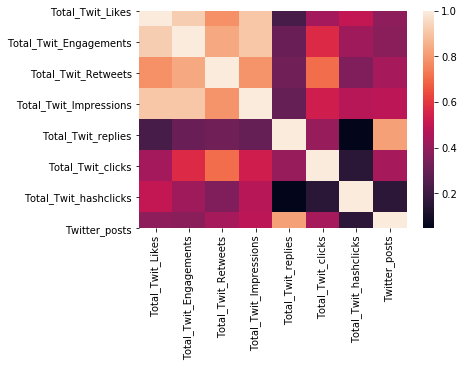

In [47]:
corrs = df[['Total_Twit_Likes', 'Total_Twit_Engagements', 'Total_Twit_Retweets',
       'Total_Twit_Impressions', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Twitter_posts']].corr()

sns.heatmap(corrs)

In [48]:
#First simple model
X = sm.add_constant(df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     38.63
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.37e-27
Time:                        18:01:14   Log-Likelihood:                -2727.1
No. Observations:                 373   AIC:                             5464.
Df Residuals:                     368   BIC:                             5484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    67.9030     20.016      3.392      0.001      28.543     107.263
Total_Twit_Likes          6.2143      2.398      2.591      0.010       1.498      10.931
Total_Twit_replies      -35.2690     22.993     -1.534      0.126     -80.484       9.945
Total_Twit_clicks        49.2079      4.992      9.857      0.000      39.391      59.025
Total_Twit_hashclicks  -142.1871     48.058     -2.959      0.003    -236.690     -47.684
==============================================================================
Omnibus:                      405.723   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23746.917
Skew:                           4.719   Prob(JB):                         0.00
Kurtosis:                      40.933   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

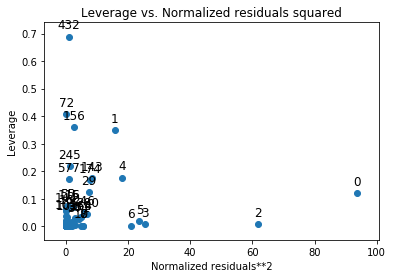

In [49]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [50]:
#Dropping outliers and redefining dependent variables 
df_twit = df[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']].drop([0,3,2,5,6,4])
y_posts_twit = y_posts.drop([0,3,2,5,6,4])
y_values_twit = y_values.drop([0,3,2,5,6,4])
y_indiv_p_twit = y_indiv_posts.drop([0,3,2,5,6,4])
y_indiv_v_twit = y_indiv_value.drop([0,3,2,5,6,4])
y_emp_p_twit = y_emp_posts.drop([0,3,2,5,6,4])
y_emp_v_twit = y_emp_value.drop([0,3,2,5,6,4])

In [51]:
#-------Twitter--------
#General Posts counts
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_posts_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     49.85
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.10e-33
Time:                        18:01:15   Log-Likelihood:                -2452.7
No. Observations:                 367   AIC:                             4915.
Df Residuals:                     362   BIC:                             4935.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    57.0853     10.729      5.321      0.000      35.987      78.184
Total_Twit_Likes         -0.1127      1.360     -0.083      0.934      -2.788       2.562
Total_Twit_replies      -34.9312     12.958     -2.696      0.007     -60.414      -9.448
Total_Twit_clicks        36.4766      2.861     12.751      0.000      30.851      42.102
Total_Twit_hashclicks   -38.8061     26.182     -1.482      0.139     -90.294      12.682
==============================================================================
Omnibus:                      432.197   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53943.488
Skew:                           5.045   Prob(JB):                         0.00
Kurtosis:                      61.530   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#General donation value
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_values_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.345
Model:                                 OLS   Adj. R-squared:                  0.338
Method:                      Least Squares   F-statistic:                     47.72
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           3.24e-32
Time:                             18:01:15   Log-Likelihood:                -3974.0
No. Observations:                      367   AIC:                             7958.
Df Residuals:                          362   BIC:                             7978.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3601.5464    677.260      5.318      0.000    2269.689    4933.404
Total_Twit_Likes        -12.9144     85.868     -0.150      0.881    -181.778     155.949
Total_Twit_replies    -2185.2563    818.001     -2.671      0.008   -3793.887    -576.625
Total_Twit_clicks      2258.7379    180.580     12.508      0.000    1903.621    2613.855
Total_Twit_hashclicks -2314.5680   1652.753     -1.400      0.162   -5564.772     935.636
==============================================================================
Omnibus:                      420.280   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47763.505
Skew:                           4.832   Prob(JB):                         0.00
Kurtosis:                      58.046   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Individual Donation count
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_indiv_p_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.356
Model:                                           OLS   Adj. R-squared:                  0.349
Method:                                Least Squares   F-statistic:                     50.13
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           1.48e-33
Time:                                       18:01:15   Log-Likelihood:                -2450.1
No. Observations:                                367   AIC:                             4910.
Df Residuals:                                    362   BIC:                             4930.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    55.9616     10.651      5.254      0.000      35.016      76.907
Total_Twit_Likes         -0.1201      1.350     -0.089      0.929      -2.776       2.536
Total_Twit_replies      -34.7132     12.864     -2.698      0.007     -60.012      -9.415
Total_Twit_clicks        36.3144      2.840     12.787      0.000      30.730      41.899
Total_Twit_hashclicks   -38.5171     25.992     -1.482      0.139     -89.632      12.598
==============================================================================
Omnibus:                      433.513   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54811.007
Skew:                           5.068   Prob(JB):                         0.00
Kurtosis:                      62.005   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Individual Donation value
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_indiv_v_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.359
Model:                                            OLS   Adj. R-squared:                  0.352
Method:                                 Least Squares   F-statistic:                     50.71
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           7.07e-34
Time:                                        18:01:15   Log-Likelihood:                -3955.9
No. Observations:                                 367   AIC:                             7922.
Df Residuals:                                     362   BIC:                             7941.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3174.0015    644.637      4.924      0.000    1906.297    4441.706
Total_Twit_Likes        -14.4139     81.732     -0.176      0.860    -175.144     146.316
Total_Twit_replies    -2111.8887    778.599     -2.712      0.007   -3643.034    -580.743
Total_Twit_clicks      2215.2028    171.881     12.888      0.000    1877.191    2553.214
Total_Twit_hashclicks -2144.5658   1573.143     -1.363      0.174   -5238.213     949.081
==============================================================================
Omnibus:                      434.098   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56520.292
Skew:                           5.067   Prob(JB):                         0.00
Kurtosis:                      62.945   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Organization Donation count
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_emp_p_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.075
Model:                                       OLS   Adj. R-squared:                  0.065
Method:                            Least Squares   F-statistic:                     7.327
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.10e-05
Time:                                   18:01:15   Log-Likelihood:                -825.97
No. Observations:                            367   AIC:                             1662.
Df Residuals:                                362   BIC:                             1681.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1237      0.127      8.813      0.000       0.873       1.374
Total_Twit_Likes          0.0075      0.016      0.461      0.645      -0.024       0.039
Total_Twit_replies       -0.2181      0.154     -1.416      0.158      -0.521       0.085
Total_Twit_clicks         0.1622      0.034      4.770      0.000       0.095       0.229
Total_Twit_hashclicks    -0.2889      0.311     -0.929      0.354      -0.901       0.323
==============================================================================
Omnibus:                      304.963   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5580.538
Skew:                           3.466   Prob(JB):                         0.00
Kurtosis:                      20.801   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Organization Donation value
X = sm.add_constant(df_twit[['Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks']])
model2 = sm.OLS(y_emp_v_twit, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.011
Model:                                         OLS   Adj. R-squared:                  0.000
Method:                              Least Squares   F-statistic:                     1.012
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):              0.401
Time:                                     18:01:15   Log-Likelihood:                -3245.3
No. Observations:                              367   AIC:                             6501.
Df Residuals:                                  362   BIC:                             6520.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   427.5449     92.981      4.598      0.000     244.694     610.396
Total_Twit_Likes          1.4995     11.789      0.127      0.899     -21.684      24.683
Total_Twit_replies      -73.3675    112.303     -0.653      0.514    -294.216     147.481
Total_Twit_clicks        43.5351     24.792      1.756      0.080      -5.219      92.289
Total_Twit_hashclicks  -170.0022    226.906     -0.749      0.454    -616.223     276.218
==============================================================================
Omnibus:                      642.625   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           308498.917
Skew:                          10.199   Prob(JB):                         0.00
Kurtosis:                     143.564   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Newsletters

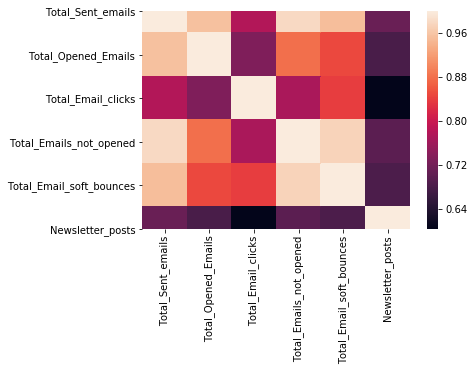

In [57]:
corrs = df[['Total_Sent_emails', 'Total_Opened_Emails',
       'Total_Email_clicks', 'Total_Emails_not_opened',
       'Total_Email_soft_bounces', 'Newsletter_posts' ]].corr()
sns.heatmap(corrs)

In [58]:
#First simple model
X = sm.add_constant(df[['Total_Email_clicks']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     26.79
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.73e-07
Time:                        18:01:16   Log-Likelihood:                -2779.5
No. Observations:                 373   AIC:                             5563.
Df Residuals:                     371   BIC:                             5571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.3143     21.876      5.408      0.000      75.298     161.330
Total_Email_clicks     0.5585      0.108      5.175      0.000       0.346       0.771
==============================================================================
Omnibus:                      543.377   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79895.750
Skew:                           7.539   Prob(JB):                         0.00
Kurtosis:                      73.096   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

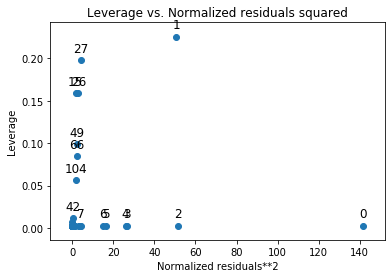

In [59]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [60]:
#Dropping outliers and redefining dependent variables 
df_news = df[['Total_Email_clicks']].drop([0,2,3,4,5,6])
y_posts_news = y_posts.drop([0,2,3,4,5,6])
y_values_news = y_values.drop([0,2,3,4,5,6])
y_indiv_p_news = y_indiv_posts.drop([0,2,3,4,5,6])
y_indiv_v_news = y_indiv_value.drop([0,2,3,4,5,6])
y_emp_p_news = y_emp_posts.drop([0,2,3,4,5,6])
y_emp_v_news = y_emp_value.drop([0,2,3,4,5,6])

In [61]:
#-------Newsletters--------
#General Posts counts
X = sm.add_constant(df_news[['Total_Email_clicks']])
model2 = sm.OLS(y_posts_news, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     118.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           4.31e-24
Time:                        18:01:16   Log-Likelihood:                -2481.6
No. Observations:                 367   AIC:                             4967.
Df Residuals:                     365   BIC:                             4975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 75.1230     11.068      6.788      0.000      53.358      96.888
Total_Email_clicks     0.5896      0.054     10.887      0.000       0.483       0.696
==============================================================================
Omnibus:                      564.818   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187983.866
Skew:                           7.921   Prob(JB):                         0.00
Kurtosis:                     112.737   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#General donation value
X = sm.add_constant(df_news[['Total_Email_clicks']])
model1 = sm.OLS(y_values_news, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.239
Model:                                 OLS   Adj. R-squared:                  0.237
Method:                      Least Squares   F-statistic:                     114.8
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.81e-23
Time:                             18:01:16   Log-Likelihood:                -4001.5
No. Observations:                      367   AIC:                             8007.
Df Residuals:                          365   BIC:                             8015.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4706.5894    696.051      6.762      0.000    3337.816    6075.363
Total_Email_clicks    36.4852      3.406     10.713      0.000      29.788      43.183
==============================================================================
Omnibus:                      552.857   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171281.646
Skew:                           7.614   Prob(JB):                         0.00
Kurtosis:                     107.733   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Individual Donation count
X = sm.add_constant(df_news[['Total_Email_clicks']])
model1 = sm.OLS(y_indiv_p_news, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.246
Model:                                           OLS   Adj. R-squared:                  0.244
Method:                                Least Squares   F-statistic:                     119.0
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           3.57e-24
Time:                                       18:01:16   Log-Likelihood:                -2479.1
No. Observations:                                367   AIC:                             4962.
Df Residuals:                                    365   BIC:                             4970.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 73.9177     10.993      6.724      0.000      52.301      95.535
Total_Email_clicks     0.5868      0.054     10.910      0.000       0.481       0.693
==============================================================================
Omnibus:                      566.291   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190707.829
Skew:                           7.958   Prob(JB):                         0.00
Kurtosis:                     113.535   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Individual Donation value
X = sm.add_constant(df_news[['Total_Email_clicks']])
model1 = sm.OLS(y_indiv_v_news, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.246
Model:                                            OLS   Adj. R-squared:                  0.244
Method:                                 Least Squares   F-statistic:                     119.4
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           3.14e-24
Time:                                        18:01:16   Log-Likelihood:                -3985.6
No. Observations:                                 367   AIC:                             7975.
Df Residuals:                                     365   BIC:                             7983.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4270.7535    666.450      6.408      0.000    2960.190    5581.317
Total_Email_clicks    35.6255      3.261     10.925      0.000      29.213      42.038
==============================================================================
Omnibus:                      568.129   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199147.942
Skew:                           7.990   Prob(JB):                         0.00
Kurtosis:                     115.995   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Organization Donation count
X = sm.add_constant(df_news[['Total_Email_clicks']])
model1 = sm.OLS(y_emp_p_news, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.055
Model:                                       OLS   Adj. R-squared:                  0.053
Method:                            Least Squares   F-statistic:                     21.39
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           5.20e-06
Time:                                   18:01:16   Log-Likelihood:                -829.80
No. Observations:                            367   AIC:                             1664.
Df Residuals:                                365   BIC:                             1671.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2052      0.123      9.812      0.000       0.964       1.447
Total_Email_clicks     0.0028      0.001      4.625      0.000       0.002       0.004
==============================================================================
Omnibus:                      315.729   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6353.997
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      22.062   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Organization Donation value
X = sm.add_constant(df_news[['Total_Email_clicks']])
model1 = sm.OLS(y_emp_v_news, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.011
Model:                                         OLS   Adj. R-squared:                  0.008
Method:                              Least Squares   F-statistic:                     3.927
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):             0.0483
Time:                                     18:01:17   Log-Likelihood:                -3245.3
No. Observations:                              367   AIC:                             6495.
Df Residuals:                                  365   BIC:                             6502.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                435.8359     88.669      4.915      0.000     261.470     610.202
Total_Email_clicks     0.8597      0.434      1.982      0.048       0.007       1.713
==============================================================================
Omnibus:                      642.191   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307343.965
Skew:                          10.185   Prob(JB):                         0.00
Kurtosis:                     143.299   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##KANTAR


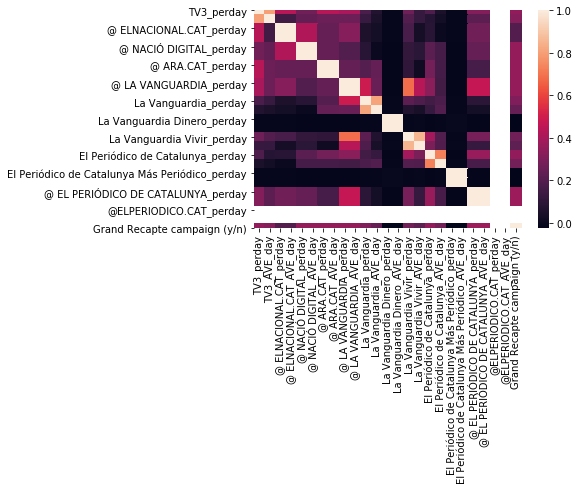

In [67]:
corr_kantar = df[['TV3_perday',
 'TV3_AVE_day',
 '@ ELNACIONAL.CAT_perday',
 '@ ELNACIONAL.CAT_AVE_day',
 '@ NACIÓ DIGITAL_perday',
 '@ NACIÓ DIGITAL_AVE_day',
 '@ ARA.CAT_perday',
 '@ ARA.CAT_AVE_day',
 '@ LA VANGUARDIA_perday',
 '@ LA VANGUARDIA_AVE_day',
 'La Vanguardia_perday',
 'La Vanguardia_AVE_day',
 'La Vanguardia Dinero_perday',
 'La Vanguardia Dinero_AVE_day',
 'La Vanguardia Vivir_perday',
 'La Vanguardia Vivir_AVE_day',
 'El Periódico de Catalunya_perday',
 'El Periódico de Catalunya_AVE_day',
 'El Periódico de Catalunya Más Periódico_perday',
 'El Periódico de Catalunya Más Periódico_AVE_day',
 '@ EL PERIÓDICO DE CATALUNYA_perday',
 '@ EL PERIÓDICO DE CATALUNYA_AVE_day',
 '@ELPERIODICO.CAT_perday',
 '@ELPERIODICO.CAT_AVE_day', 'Grand Recapte campaign (y/n)']].corr()

sns.heatmap(corr_kantar)

In [68]:
#First simple model
X = sm.add_constant(df[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia Vivir_perday',
'La Vanguardia Dinero_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

/Users/i.p.kruyt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/i.p.kruyt/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     41.00
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.02e-57
Time:                        18:01:17   Log-Likelihood:                -2641.3
No. Observations:                 373   AIC:                             5307.
Df Residuals:                     361   BIC:                             5354.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             33.8228     16.340      2.070      0.039       1.689      65.957
TV3_perday                                       337.9294     44.514      7.592      0.000     250.391     425.468
@ ELNACIONAL.CAT_perday                          132.5116     58.037      2.283      0.023      18.378     246.645
@ NACIÓ DIGITAL_perday                           179.2511     32.996      5.432      0.000     114.362     244.141
@ ARA.CAT_perday                                  50.8972     59.301      0.858      0.391     -65.722     167.516
@ LA VANGUARDIA_perday                            27.2588     52.722      0.517      0.605     -76.421     130.939
La Vanguardia Vivir_perday                       577.4791     89.610      6.444      0.000     401.255     753.703
La Vanguardia Dinero_perday                      -15.8228    292.997     -0.054      0.957    -592.018     560.373
La Vanguardia_perday                             118.4580     62.551      1.894      0.059      -4.552     241.469
El Periódico de Catalunya_perday                 -26.3053     66.388     -0.396      0.692    -156.861     104.251
El Periódico de Catalunya Más Periódico_perday     6.1772    292.997      0.021      0.983    -570.018     582.373
@ EL PERIÓDICO DE CATALUNYA_perday                48.2613     57.248      0.843      0.400     -64.320     160.843
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      358.616   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23980.837
Skew:                           3.746   Prob(JB):                         0.00
Kurtosis:                      41.560   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

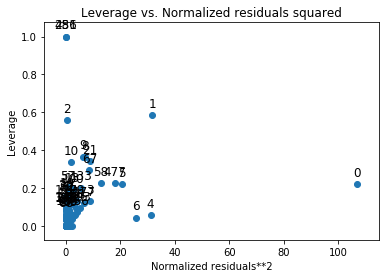

In [69]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model1)
plt.show()

In [70]:
#Dropping outliers and redefining dependent variables 
df_kntr = df[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia Vivir_perday',
'La Vanguardia Dinero_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']].drop([0,3,4,5,6,133])
y_posts_kntr = y_posts.drop([0,3,4,5,6,133])
y_values_kntr = y_values.drop([0,3,4,5,6,133])
y_indiv_p_kntr = y_indiv_posts.drop([0,3,4,5,6,133])
y_indiv_v_kntr = y_indiv_value.drop([0,3,4,5,6,133])
y_emp_p_kntr = y_emp_posts.drop([0,3,4,5,6,133])
y_emp_v_kntr = y_emp_value.drop([0,3,4,5,6,133])

In [71]:
#-------KANTAR--------
#General Posts counts
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_posts_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     117.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          6.83e-101
Time:                        18:01:18   Log-Likelihood:                -2346.0
No. Observations:                 367   AIC:                             4712.
Df Residuals:                     357   BIC:                             4751.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             41.7579      8.188      5.100      0.000      25.655      57.861
TV3_perday                                       326.0029     23.173     14.068      0.000     280.429     371.576
@ ELNACIONAL.CAT_perday                          412.7965     31.276     13.198      0.000     351.288     474.305
@ NACIÓ DIGITAL_perday                             4.3550     17.818      0.244      0.807     -30.687      39.397
@ ARA.CAT_perday                                  22.3612     31.731      0.705      0.481     -40.042      84.764
@ LA VANGUARDIA_perday                            26.0287     22.414      1.161      0.246     -18.052      70.109
La Vanguardia_perday                             120.5914     31.515      3.826      0.000      58.613     182.570
El Periódico de Catalunya_perday                  71.1033     32.384      2.196      0.029       7.415     134.792
El Periódico de Catalunya Más Periódico_perday    -1.7579    146.772     -0.012      0.990    -290.404     286.888
@ EL PERIÓDICO DE CATALUNYA_perday                -7.7020     29.110     -0.265      0.791     -64.951      49.547
==============================================================================
Omnibus:                       96.303   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3618.115
Skew:                          -0.112   Prob(JB):                         0.00
Kurtosis:                      18.380   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Testing effect of using only significant channels
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday']])
model1 = sm.OLS(y_posts_kntr, X).fit()
model1.summary()

#Shows support for these being the top 4 channels within Traditional Media

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     265.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          3.03e-106
Time:                        18:01:18   Log-Likelihood:                -2347.0
No. Observations:                 367   AIC:                             4704.
Df Residuals:                     362   BIC:                             4723.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               42.4607      7.964      5.331      0.000      26.799      58.123
TV3_perday                         337.3255     20.702     16.294      0.000     296.614     378.037
@ ELNACIONAL.CAT_perday            422.3611     28.343     14.902      0.000     366.623     478.099
La Vanguardia_perday               141.8452     26.769      5.299      0.000      89.203     194.488
El Periódico de Catalunya_perday    81.5454     29.374      2.776      0.006      23.781     139.310
==============================================================================
Omnibus:                       94.785   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2996.755
Skew:                          -0.238   Prob(JB):                         0.00
Kurtosis:                      16.991   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#General donation value
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_values_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.740
Model:                                 OLS   Adj. R-squared:                  0.734
Method:                      Least Squares   F-statistic:                     112.9
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           8.43e-99
Time:                             18:01:18   Log-Likelihood:                -3861.9
No. Observations:                      367   AIC:                             7744.
Df Residuals:                          357   BIC:                             7783.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           2586.2008    509.312      5.078      0.000    1584.572    3587.829
TV3_perday                                       1.86e+04   1441.448     12.901      0.000    1.58e+04    2.14e+04
@ ELNACIONAL.CAT_perday                         2.639e+04   1945.452     13.566      0.000    2.26e+04    3.02e+04
@ NACIÓ DIGITAL_perday                           673.8842   1108.343      0.608      0.544   -1505.817    2853.585
@ ARA.CAT_perday                                3415.9088   1973.756      1.731      0.084    -465.741    7297.559
@ LA VANGUARDIA_perday                           400.1575   1394.222      0.287      0.774   -2341.763    3142.078
La Vanguardia_perday                            8238.7441   1960.321      4.203      0.000    4383.516    1.21e+04
El Periódico de Catalunya_perday                3221.1896   2014.400      1.599      0.111    -740.392    7182.771
El Periódico de Catalunya Más Periódico_perday   -90.2008   9129.600     -0.010      0.992    -1.8e+04    1.79e+04
@ EL PERIÓDICO DE CATALUNYA_perday               415.1894   1810.723      0.229      0.819   -3145.835    3976.213
==============================================================================
Omnibus:                       93.712   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3280.430
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                      17.646   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Individual Donation count
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_indiv_p_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.747
Model:                                           OLS   Adj. R-squared:                  0.741
Method:                                Least Squares   F-statistic:                     117.2
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):          6.71e-101
Time:                                       18:01:18   Log-Likelihood:                -2343.6
No. Observations:                                367   AIC:                             4707.
Df Residuals:                                    357   BIC:                             4746.
Df Model:                                          9                                         
Covariance Type:                           nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             40.9036      8.133      5.029      0.000      24.909      56.898
TV3_perday                                       324.3583     23.018     14.092      0.000     279.091     369.626
@ ELNACIONAL.CAT_perday                          410.8112     31.066     13.224      0.000     349.716     471.907
@ NACIÓ DIGITAL_perday                             4.2886     17.699      0.242      0.809     -30.518      39.095
@ ARA.CAT_perday                                  20.6032     31.518      0.654      0.514     -41.381      82.588
@ LA VANGUARDIA_perday                            25.6498     22.264      1.152      0.250     -18.135      69.434
La Vanguardia_perday                             119.6404     31.304      3.822      0.000      58.078     181.203
El Periódico de Catalunya_perday                  71.0476     32.167      2.209      0.028       7.787     134.309
El Periódico de Catalunya Más Periódico_perday    -0.9036    145.787     -0.006      0.995    -287.613     285.806
@ EL PERIÓDICO DE CATALUNYA_perday                -8.6408     28.915     -0.299      0.765     -65.505      48.224
==============================================================================
Omnibus:                       96.950   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3703.322
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                      18.560   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Individual Donation value
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_indiv_v_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.740
Model:                                            OLS   Adj. R-squared:                  0.734
Method:                                 Least Squares   F-statistic:                     113.2
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           6.42e-99
Time:                                        18:01:18   Log-Likelihood:                -3846.1
No. Observations:                                 367   AIC:                             7712.
Df Residuals:                                     357   BIC:                             7751.
Df Model:                                           9                                         
Covariance Type:                            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           2327.3239    487.918      4.770      0.000    1367.769    3286.879
TV3_perday                                      1.844e+04   1380.900     13.353      0.000    1.57e+04    2.12e+04
@ ELNACIONAL.CAT_perday                         2.562e+04   1863.733     13.747      0.000     2.2e+04    2.93e+04
@ NACIÓ DIGITAL_perday                           607.1670   1061.787      0.572      0.568   -1480.976    2695.310
@ ARA.CAT_perday                                1555.6390   1890.849      0.823      0.411   -2162.963    5274.241
@ LA VANGUARDIA_perday                           361.0443   1335.658      0.270      0.787   -2265.702    2987.790
La Vanguardia_perday                            8189.1861   1877.978      4.361      0.000    4495.897    1.19e+04
El Periódico de Catalunya_perday                3611.7347   1929.785      1.872      0.062    -183.441    7406.910
El Periódico de Catalunya Más Periódico_perday   168.6761   8746.112      0.019      0.985    -1.7e+04    1.74e+04
@ EL PERIÓDICO DE CATALUNYA_perday              -500.5238   1734.664     -0.289      0.773   -3911.967    2910.920
==============================================================================
Omnibus:                       98.912   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4206.501
Skew:                          -0.021   Prob(JB):                         0.00
Kurtosis:                      19.586   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Organization Donation count
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_emp_p_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.424
Model:                                       OLS   Adj. R-squared:                  0.409
Method:                            Least Squares   F-statistic:                     29.18
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           6.30e-38
Time:                                   18:01:18   Log-Likelihood:                -779.37
No. Observations:                            367   AIC:                             1579.
Df Residuals:                                357   BIC:                             1618.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.8542      0.115      7.453      0.000       0.629       1.080
TV3_perday                                         1.6446      0.324      5.070      0.000       1.007       2.283
@ ELNACIONAL.CAT_perday                            1.9852      0.438      4.534      0.000       1.124       2.846
@ NACIÓ DIGITAL_perday                             0.0664      0.249      0.266      0.790      -0.424       0.557
@ ARA.CAT_perday                                   1.7580      0.444      3.958      0.000       0.884       2.632
@ LA VANGUARDIA_perday                             0.3789      0.314      1.208      0.228      -0.238       0.996
La Vanguardia_perday                               0.9510      0.441      2.156      0.032       0.083       1.819
El Periódico de Catalunya_perday                   0.0557      0.453      0.123      0.902      -0.836       0.947
El Periódico de Catalunya Más Periódico_perday    -0.8542      2.055     -0.416      0.678      -4.895       3.186
@ EL PERIÓDICO DE CATALUNYA_perday                 0.9388      0.407      2.304      0.022       0.137       1.740
==============================================================================
Omnibus:                      282.483   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5758.223
Skew:                           3.031   Prob(JB):                         0.00
Kurtosis:                      21.434   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Organization Donation value
X = sm.add_constant(df_kntr[['TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday']])
model1 = sm.OLS(y_emp_v_kntr, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.209
Model:                                         OLS   Adj. R-squared:                  0.189
Method:                              Least Squares   F-statistic:                     10.48
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           2.07e-14
Time:                                     18:01:18   Log-Likelihood:                -3216.8
No. Observations:                              367   AIC:                             6454.
Df Residuals:                                  357   BIC:                             6493.
Df Model:                                        9                                         
Covariance Type:                         nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                            258.8769     87.814      2.948      0.003      86.178     431.575
TV3_perday                                       156.5650    248.531      0.630      0.529    -332.204     645.334
@ ELNACIONAL.CAT_perday                          770.2927    335.430      2.296      0.022     110.625    1429.960
@ NACIÓ DIGITAL_perday                            66.7172    191.098      0.349      0.727    -309.102     442.536
@ ARA.CAT_perday                                1860.2698    340.310      5.466      0.000    1191.005    2529.535
@ LA VANGUARDIA_perday                            39.1132    240.388      0.163      0.871    -433.642     511.868
La Vanguardia_perday                              49.5580    337.994      0.147      0.884    -615.151     714.267
El Periódico de Catalunya_perday                -390.5452    347.318     -1.124      0.262   -1073.591     292.501
El Periódico de Catalunya Más Periódico_perday  -258.8769   1574.103     -0.164      0.869   -3354.558    2836.804
@ EL PERIÓDICO DE CATALUNYA_perday               915.7132    312.200      2.933      0.004     301.730    1529.696
==============================================================================
Omnibus:                      644.963   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331467.613
Skew:                          10.239   Prob(JB):                         0.00
Kurtosis:                     148.798   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##All promotions

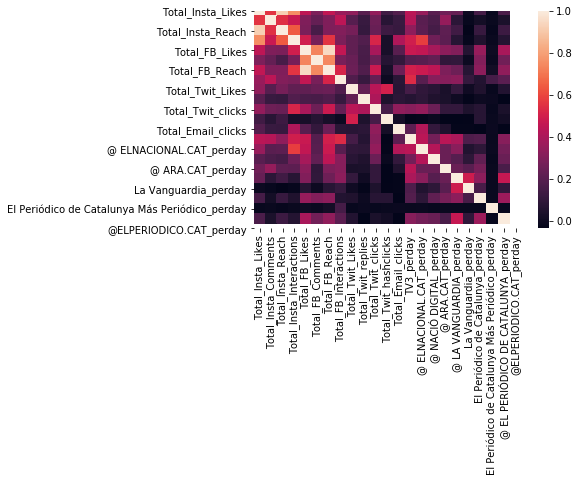

In [78]:
corrs = df[['Total_Insta_Likes',
       'Total_Insta_Comments', 'Total_Insta_Reach',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments',
       'Total_FB_Reach', 'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']].corr()

sns.heatmap(corrs)

In [79]:
#First simple model
X = sm.add_constant(df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model1 = sm.OLS(y_posts, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     37.59
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           8.08e-75
Time:                        18:01:19   Log-Likelihood:                -2579.3
No. Observations:                 373   AIC:                             5201.
Df Residuals:                     352   BIC:                             5283.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.8567     14.794     -0.328      0.743     -33.953      24.240
Total_Insta_Likes                                  1.4722      0.534      2.757      0.006       0.422       2.523
Total_Insta_Comments                             -12.2518      6.279     -1.951      0.052     -24.601       0.098
Total_Insta_Interactions                           2.2131      1.824      1.214      0.226      -1.373       5.800
Total_FB_Likes                                     2.6073      0.640      4.073      0.000       1.348       3.866
Total_FB_Comments                                -23.2813     10.332     -2.253      0.025     -43.602      -2.961
Total_FB_Interactions                              1.1656      0.692      1.684      0.093      -0.196       2.527
Total_Twit_Likes                                   2.1345      1.744      1.224      0.222      -1.296       5.565
Total_Twit_replies                               -17.0542     16.159     -1.055      0.292     -48.835      14.726
Total_Twit_clicks                                 24.9839      4.169      5.993      0.000      16.784      33.183
Total_Twit_hashclicks                            -69.3677     33.811     -2.052      0.041    -135.864      -2.871
Total_Email_clicks                                 0.2013      0.076      2.635      0.009       0.051       0.352
TV3_perday                                       130.9771     45.663      2.868      0.004      41.171     220.783
@ ELNACIONAL.CAT_perday                         -168.9330     64.260     -2.629      0.009    -295.315     -42.551
@ NACIÓ DIGITAL_perday                           121.0705     29.808      4.062      0.000      62.447     179.694
@ ARA.CAT_perday                                  11.3055     53.945      0.210      0.834     -94.790     117.401
@ LA VANGUARDIA_perday                           239.2033     39.650      6.033      0.000     161.222     317.185
La Vanguardia_perday                              73.4579     53.962      1.361      0.174     -32.671     179.587
El Periódico de Catalunya_perday                  37.5956     58.639      0.641      0.522     -77.731     152.922
El Periódico de Catalunya Más Periódico_perday   -79.1309    257.696     -0.307      0.759    -585.949     427.687
@ EL PERIÓDICO DE CATALUNYA_perday                34.4286     50.815      0.678      0.499     -65.510     134.367
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      370.030   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Ber

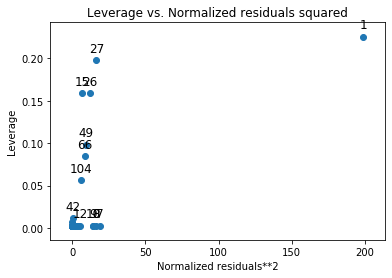

In [80]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model2)
plt.show()

In [81]:
#Dropping outliers and redefining dependent variables 
df_tot = df[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']].drop([0,3,4,5,6,35,177,193])
y_posts_tot = y_posts.drop([0,3,4,5,6,35,177,193])
y_values_tot = y_values.drop([0,3,4,5,6,35,177,193])
y_indiv_p_tot = y_indiv_posts.drop([0,3,4,5,6,35,177,193])
y_indiv_v_tot = y_indiv_value.drop([0,3,4,5,6,35,177,193])
y_emp_p_tot = y_emp_posts.drop([0,3,4,5,6,35,177,193])
y_emp_v_tot = y_emp_value.drop([0,3,4,5,6,35,177,193])

In [82]:
#-------General----------
#General Posts counts
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model2 = sm.OLS(y_posts_tot, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          5.37e-136
Time:                        18:01:19   Log-Likelihood:                -2220.0
No. Observations:                 365   AIC:                             4482.
Df Residuals:                     344   BIC:                             4564.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             26.0752      6.526      3.996      0.000      13.240      38.910
Total_Insta_Likes                                  0.2317      0.265      0.874      0.383      -0.290       0.753
Total_Insta_Comments                             -10.3768      2.908     -3.568      0.000     -16.097      -4.657
Total_Insta_Interactions                           4.3292      0.833      5.198      0.000       2.691       5.967
Total_FB_Likes                                     1.3450      0.298      4.518      0.000       0.759       1.930
Total_FB_Comments                                -11.7596      5.083     -2.314      0.021     -21.757      -1.763
Total_FB_Interactions                             -1.0440      0.351     -2.973      0.003      -1.735      -0.353
Total_Twit_Likes                                   1.0447      0.780      1.339      0.181      -0.490       2.579
Total_Twit_replies                                -7.8197      7.355     -1.063      0.288     -22.286       6.647
Total_Twit_clicks                                  7.7957      1.991      3.916      0.000       3.880      11.711
Total_Twit_hashclicks                             -3.6925     15.147     -0.244      0.808     -33.486      26.101
Total_Email_clicks                                 0.1455      0.033      4.354      0.000       0.080       0.211
TV3_perday                                       331.2122     23.896     13.861      0.000     284.212     378.213
@ ELNACIONAL.CAT_perday                           81.3087     29.285      2.776      0.006      23.709     138.909
@ NACIÓ DIGITAL_perday                            12.2078     13.680      0.892      0.373     -14.700      39.116
@ ARA.CAT_perday                                  74.2380     25.535      2.907      0.004      24.014     124.462
@ LA VANGUARDIA_perday                            56.3228     18.375      3.065      0.002      20.181      92.465
La Vanguardia_perday                             112.9853     23.803      4.747      0.000      66.168     159.803
El Periódico de Catalunya_perday                  13.5854     26.012      0.522      0.602     -37.578      64.749
El Periódico de Catalunya Más Periódico_perday    88.1724    113.079      0.780      0.436    -134.241     310.586
@ EL PERIÓDICO DE CATALUNYA_perday                22.4000     23.299      0.961      0.337     -23.427      68.227
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       53.334   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Ber

In [83]:
#General donation value
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model = sm.OLS(y_values_tot, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.855
Model:                                 OLS   Adj. R-squared:                  0.847
Method:                      Least Squares   F-statistic:                     101.8
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):          3.92e-131
Time:                             18:01:19   Log-Likelihood:                -3734.6
No. Observations:                      365   AIC:                             7511.
Df Residuals:                          344   BIC:                             7593.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           1652.5877    413.731      3.994      0.000     838.826    2466.349
Total_Insta_Likes                                 12.2930     16.811      0.731      0.465     -20.773      45.358
Total_Insta_Comments                            -726.4920    184.381     -3.940      0.000   -1089.149    -363.835
Total_Insta_Interactions                         271.4087     52.801      5.140      0.000     167.556     375.261
Total_FB_Likes                                    90.3680     18.873      4.788      0.000      53.247     127.489
Total_FB_Comments                               -639.2100    322.246     -1.984      0.048   -1273.031      -5.389
Total_FB_Interactions                            -71.2493     22.262     -3.200      0.002    -115.037     -27.462
Total_Twit_Likes                                  55.6771     49.460      1.126      0.261     -41.606     152.960
Total_Twit_replies                              -486.4749    466.313     -1.043      0.298   -1403.658     430.708
Total_Twit_clicks                                469.7758    126.214      3.722      0.000     221.527     718.025
Total_Twit_hashclicks                             21.2049    960.368      0.022      0.982   -1867.727    1910.137
Total_Email_clicks                                 8.8311      2.118      4.169      0.000       4.665      12.997
TV3_perday                                      1.862e+04   1515.034     12.287      0.000    1.56e+04    2.16e+04
@ ELNACIONAL.CAT_perday                         5985.4838   1856.701      3.224      0.001    2333.568    9637.400
@ NACIÓ DIGITAL_perday                          1193.0543    867.358      1.376      0.170    -512.938    2899.047
@ ARA.CAT_perday                                6865.3687   1618.952      4.241      0.000    3681.079       1e+04
@ LA VANGUARDIA_perday                          2660.4614   1165.021      2.284      0.023     369.000    4951.923
La Vanguardia_perday                            7606.8793   1509.130      5.041      0.000    4638.597    1.06e+04
El Periódico de Catalunya_perday                -731.0935   1649.225     -0.443      0.658   -3974.929    2512.742
El Periódico de Catalunya Más Periódico_perday  5924.6729   7169.373      0.826      0.409   -8176.652       2e+04
@ EL PERIÓDICO DE CATALUNYA_perday              1682.4430   1477.213      1.139      0.256   -1223.063    4587.949
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       42.852   Durbin-Watson:                   1

In [84]:
#Individual donations count
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model = sm.OLS(y_indiv_p_tot, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.865
Model:                                           OLS   Adj. R-squared:                  0.857
Method:                                Least Squares   F-statistic:                     110.4
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):          2.50e-136
Time:                                       18:01:19   Log-Likelihood:                -2216.8
No. Observations:                                365   AIC:                             4476.
Df Residuals:                                    344   BIC:                             4557.
Df Model:                                         20                                         
Covariance Type:                           nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             25.2836      6.468      3.909      0.000      12.563      38.005
Total_Insta_Likes                                  0.2255      0.263      0.858      0.391      -0.291       0.742
Total_Insta_Comments                             -10.2172      2.882     -3.545      0.000     -15.886      -4.548
Total_Insta_Interactions                           4.3271      0.825      5.242      0.000       2.704       5.951
Total_FB_Likes                                     1.3201      0.295      4.474      0.000       0.740       1.900
Total_FB_Comments                                -11.5132      5.037     -2.286      0.023     -21.421      -1.605
Total_FB_Interactions                             -1.0323      0.348     -2.966      0.003      -1.717      -0.348
Total_Twit_Likes                                   1.0344      0.773      1.338      0.182      -0.486       2.555
Total_Twit_replies                                -7.7608      7.290     -1.065      0.288     -22.099       6.577
Total_Twit_clicks                                  7.7908      1.973      3.949      0.000       3.910      11.671
Total_Twit_hashclicks                             -3.6965     15.013     -0.246      0.806     -33.225      25.832
Total_Email_clicks                                 0.1447      0.033      4.369      0.000       0.080       0.210
TV3_perday                                       329.4446     23.684     13.910      0.000     282.862     376.027
@ ELNACIONAL.CAT_perday                           80.9825     29.025      2.790      0.006      23.894     138.071
@ NACIÓ DIGITAL_perday                            12.0464     13.559      0.888      0.375     -14.622      38.715
@ ARA.CAT_perday                                  72.0688     25.308      2.848      0.005      22.291     121.847
@ LA VANGUARDIA_perday                            55.9370     18.212      3.071      0.002      20.116      91.758
La Vanguardia_perday                             112.0327     23.591      4.749      0.000      65.631     158.434
El Periódico de Catalunya_perday                  14.0079     25.781      0.543      0.587     -36.701      64.717
El Periódico de Catalunya Más Periódico_perday    88.2282    112.074      0.787      0.432    -132.209     308.665
@ EL PERIÓDICO DE CATALUNYA_perday                21.8024     23.092      0.944      0.346     -23.618      67.222
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
===========================================

In [85]:
#Individual donations value
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model = sm.OLS(y_indiv_v_tot, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.862
Model:                                            OLS   Adj. R-squared:                  0.854
Method:                                 Least Squares   F-statistic:                     107.6
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):          1.11e-134
Time:                                        18:01:19   Log-Likelihood:                -3710.5
No. Observations:                                 365   AIC:                             7463.
Df Residuals:                                     344   BIC:                             7545.
Df Model:                                          20                                         
Covariance Type:                            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                           1388.4696    387.297      3.585      0.000     626.701    2150.238
Total_Insta_Likes                                  9.1280     15.737      0.580      0.562     -21.825      40.081
Total_Insta_Comments                            -642.1671    172.601     -3.721      0.000    -981.653    -302.681
Total_Insta_Interactions                         278.9319     49.427      5.643      0.000     181.715     376.149
Total_FB_Likes                                    75.6110     17.667      4.280      0.000      40.862     110.360
Total_FB_Comments                               -543.5142    301.657     -1.802      0.072   -1136.839      49.810
Total_FB_Interactions                            -65.7925     20.840     -3.157      0.002    -106.782     -24.803
Total_Twit_Likes                                  54.8904     46.300      1.186      0.237     -36.177     145.957
Total_Twit_replies                              -481.5640    436.519     -1.103      0.271   -1340.146     377.018
Total_Twit_clicks                                483.7854    118.150      4.095      0.000     251.398     716.173
Total_Twit_hashclicks                             42.3015    899.007      0.047      0.962   -1725.941    1810.544
Total_Email_clicks                                 8.5745      1.983      4.324      0.000       4.675      12.474
TV3_perday                                      1.849e+04   1418.234     13.040      0.000    1.57e+04    2.13e+04
@ ELNACIONAL.CAT_perday                         5608.8427   1738.071      3.227      0.001    2190.258    9027.427
@ NACIÓ DIGITAL_perday                          1080.4386    811.940      1.331      0.184    -516.553    2677.431
@ ARA.CAT_perday                                4884.0683   1515.512      3.223      0.001    1903.232    7864.905
@ LA VANGUARDIA_perday                          2574.9248   1090.585      2.361      0.019     429.872    4719.978
La Vanguardia_perday                            7576.0892   1412.707      5.363      0.000    4797.458    1.04e+04
El Periódico de Catalunya_perday                 -52.1185   1543.852     -0.034      0.973   -3088.696    2984.459
El Periódico de Catalunya Más Periódico_perday  5877.9901   6711.301      0.876      0.382   -7322.361    1.91e+04
@ EL PERIÓDICO DE CATALUNYA_perday              1185.1081   1382.829      0.857      0.392   -1534.757    3904.973
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
================================

In [86]:
#Organization donations value
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model = sm.OLS(y_emp_p_tot, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.479
Model:                                       OLS   Adj. R-squared:                  0.449
Method:                            Least Squares   F-statistic:                     15.84
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.15e-37
Time:                                   18:01:20   Log-Likelihood:                -755.42
No. Observations:                            365   AIC:                             1553.
Df Residuals:                                344   BIC:                             1635.
Df Model:                                     20                                         
Covariance Type:                       nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.7917      0.118      6.708      0.000       0.560       1.024
Total_Insta_Likes                                  0.0061      0.005      1.279      0.202      -0.003       0.016
Total_Insta_Comments                              -0.1596      0.053     -3.035      0.003      -0.263      -0.056
Total_Insta_Interactions                           0.0021      0.015      0.139      0.889      -0.028       0.032
Total_FB_Likes                                     0.0249      0.005      4.626      0.000       0.014       0.035
Total_FB_Comments                                 -0.2464      0.092     -2.680      0.008      -0.427      -0.066
Total_FB_Interactions                             -0.0117      0.006     -1.847      0.066      -0.024       0.001
Total_Twit_Likes                                   0.0104      0.014      0.734      0.463      -0.017       0.038
Total_Twit_replies                                -0.0589      0.133     -0.443      0.658      -0.320       0.203
Total_Twit_clicks                                  0.0049      0.036      0.137      0.891      -0.066       0.076
Total_Twit_hashclicks                              0.0040      0.274      0.014      0.988      -0.535       0.543
Total_Email_clicks                                 0.0008      0.001      1.282      0.201      -0.000       0.002
TV3_perday                                         1.7677      0.432      4.090      0.000       0.918       2.618
@ ELNACIONAL.CAT_perday                            0.3262      0.530      0.616      0.538      -0.716       1.368
@ NACIÓ DIGITAL_perday                             0.1615      0.247      0.653      0.514      -0.325       0.648
@ ARA.CAT_perday                                   2.1692      0.462      4.697      0.000       1.261       3.077
@ LA VANGUARDIA_perday                             0.3858      0.332      1.161      0.246      -0.268       1.039
La Vanguardia_perday                               0.9526      0.430      2.213      0.028       0.106       1.799
El Periódico de Catalunya_perday                  -0.4225      0.470     -0.898      0.370      -1.348       0.503
El Periódico de Catalunya Más Periódico_perday    -0.0557      2.045     -0.027      0.978      -4.078       3.967
@ EL PERIÓDICO DE CATALUNYA_perday                 0.5976      0.421      1.418      0.157      -0.231       1.426
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
==============================================================================
Omnibus:

In [87]:
#Organization donations value
X = sm.add_constant(df_tot[['Total_Insta_Likes',
       'Total_Insta_Comments',
       'Total_Insta_Interactions','Total_FB_Likes', 'Total_FB_Comments', 
       'Total_FB_Interactions', 'Total_Twit_Likes', 'Total_Twit_replies', 'Total_Twit_clicks',
       'Total_Twit_hashclicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'@ NACIÓ DIGITAL_perday',
'@ ARA.CAT_perday',
'@ LA VANGUARDIA_perday',
'La Vanguardia_perday','El Periódico de Catalunya_perday',
'El Periódico de Catalunya Más Periódico_perday', '@ EL PERIÓDICO DE CATALUNYA_perday',
'@ELPERIODICO.CAT_perday']])
model = sm.OLS(y_emp_v_tot, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.246
Model:                                         OLS   Adj. R-squared:                  0.202
Method:                              Least Squares   F-statistic:                     5.609
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           1.51e-12
Time:                                     18:01:20   Log-Likelihood:                -3187.9
No. Observations:                              365   AIC:                             6418.
Df Residuals:                                  344   BIC:                             6500.
Df Model:                                       20                                         
Covariance Type:                         nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                            264.1181     92.526      2.855      0.005      82.131     446.106
Total_Insta_Likes                                  3.1650      3.760      0.842      0.400      -4.230      10.560
Total_Insta_Comments                             -84.3249     41.235     -2.045      0.042    -165.429      -3.221
Total_Insta_Interactions                          -7.5232     11.808     -0.637      0.524     -30.749      15.702
Total_FB_Likes                                    14.7570      4.221      3.496      0.001       6.455      23.059
Total_FB_Comments                                -95.6958     72.066     -1.328      0.185    -237.442      46.050
Total_FB_Interactions                             -5.4568      4.979     -1.096      0.274     -15.249       4.336
Total_Twit_Likes                                   0.7867     11.061      0.071      0.943     -20.969      22.543
Total_Twit_replies                                -4.9109    104.285     -0.047      0.962    -210.027     200.205
Total_Twit_clicks                                -14.0096     28.226     -0.496      0.620     -69.527      41.508
Total_Twit_hashclicks                            -21.0967    214.774     -0.098      0.922    -443.532     401.339
Total_Email_clicks                                 0.2566      0.474      0.542      0.588      -0.675       1.188
TV3_perday                                       121.4700    338.818      0.359      0.720    -544.946     787.886
@ ELNACIONAL.CAT_perday                          376.6411    415.228      0.907      0.365    -440.064    1193.346
@ NACIÓ DIGITAL_perday                           112.6157    193.974      0.581      0.562    -268.908     494.139
@ ARA.CAT_perday                                1981.3004    362.058      5.472      0.000    1269.174    2693.426
@ LA VANGUARDIA_perday                            85.5366    260.542      0.328      0.743    -426.920     597.993
La Vanguardia_perday                              30.7902    337.498      0.091      0.927    -633.029     694.609
El Periódico de Catalunya_perday                -678.9750    368.828     -1.841      0.066   -1404.418      46.468
El Periódico de Catalunya Más Periódico_perday    46.6828   1603.339      0.029      0.977   -3106.900    3200.265
@ EL PERIÓDICO DE CATALUNYA_perday               497.3349    330.360      1.505      0.133    -152.445    1147.114
@ELPERIODICO.CAT_perday                                 0          0        nan        nan           0           0
=================================================================

##Posts only

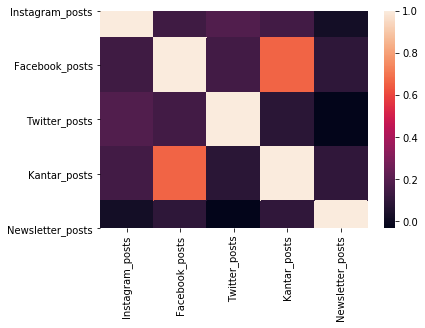

In [88]:
corrs = df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]].corr()

sns.heatmap(corrs)

In [89]:
#First simple model
X = sm.add_constant(df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     62.27
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.53e-47
Time:                        18:01:20   Log-Likelihood:                -2677.9
No. Observations:                 373   AIC:                             5368.
Df Residuals:                     367   BIC:                             5391.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0159     19.460     -0.052      0.958     -39.283      37.251
Instagram_posts     43.5495     34.491      1.263      0.208     -24.276     111.375
Facebook_posts     233.2277     25.824      9.032      0.000     182.447     284.008
Twitter_posts       39.7944     12.374      3.216      0.001      15.462      64.126
Kantar_posts         2.0481      0.533      3.845      0.000       1.001       3.095
Newsletter_posts   201.5635     71.998      2.800      0.005      59.984     343.143
==============================================================================
Omnibus:                      450.422   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61295.545
Skew:                           5.266   Prob(JB):                         0.00
Kurtosis:                      64.911   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

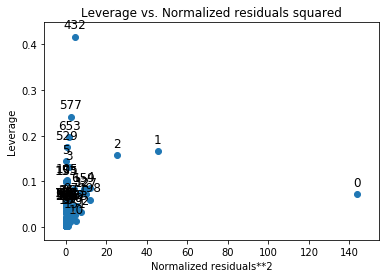

In [90]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [91]:
#Dropping outliers and redefining dependent variables 
df_pstonly = df[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']].drop([0,10])
y_posts_pstonly = y_posts.drop([0,10])
y_values_pstonly = y_values.drop([0,10])
y_indiv_p_pstonly = y_indiv_posts.drop([0,10])
y_indiv_v_pstonly = y_indiv_value.drop([0,10])
y_emp_p_pstonly = y_emp_posts.drop([0,10])
y_emp_v_pstonly = y_emp_value.drop([0,10])

In [92]:
#Posts only to general posts
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]])
model = sm.OLS(y_posts_pstonly, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     77.83
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.14e-55
Time:                        18:01:20   Log-Likelihood:                -2560.8
No. Observations:                 371   AIC:                             5134.
Df Residuals:                     365   BIC:                             5157.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8575     14.760     -0.126      0.900     -30.883      27.168
Instagram_posts     71.6411     26.206      2.734      0.007      20.108     123.174
Facebook_posts     168.2920     20.090      8.377      0.000     128.785     207.799
Twitter_posts       23.0739      9.439      2.444      0.015       4.511      41.637
Kantar_posts         2.4223      0.407      5.951      0.000       1.622       3.223
Newsletter_posts   225.2496     54.607      4.125      0.000     117.866     332.633
==============================================================================
Omnibus:                      343.830   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22264.336
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      40.290   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#Organizations donations value
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts'
       ]])
model = sm.OLS(y_values_pstonly, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.564
Model:                                 OLS   Adj. R-squared:                  0.558
Method:                      Least Squares   F-statistic:                     94.33
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.44e-63
Time:                             18:01:21   Log-Likelihood:                -4094.4
No. Observations:                      371   AIC:                             8201.
Df Residuals:                          365   BIC:                             8224.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -423.4797    921.038     -0.460      0.646   -2234.687    1387.728
Instagram_posts   4363.4729   1635.272      2.668      0.008    1147.736    7579.209
Facebook_posts    1.213e+04   1253.664      9.672      0.000    9659.755    1.46e+04
Twitter_posts     1215.3564    589.035      2.063      0.040      57.028    2373.685
Kantar_posts       164.7269     25.401      6.485      0.000     114.776     214.678
Newsletter_posts  1.292e+04   3407.530      3.792      0.000    6220.597    1.96e+04
==============================================================================
Omnibus:                      280.328   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12336.159
Skew:                           2.640   Prob(JB):                         0.00
Kurtosis:                      30.751   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Channel posts only
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']])
model = sm.OLS(y_indiv_p_pstonly, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.513
Model:                                           OLS   Adj. R-squared:                  0.507
Method:                                Least Squares   F-statistic:                     77.01
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           5.73e-55
Time:                                       18:01:21   Log-Likelihood:                -2558.7
No. Observations:                                371   AIC:                             5129.
Df Residuals:                                    365   BIC:                             5153.
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3024     14.675     -0.157      0.875     -31.161      26.557
Instagram_posts     71.3095     26.056      2.737      0.007      20.071     122.548
Facebook_posts     166.0830     19.975      8.314      0.000     126.802     205.364
Twitter_posts       23.0523      9.385      2.456      0.015       4.596      41.509
Kantar_posts         2.3955      0.405      5.919      0.000       1.600       3.191
Newsletter_posts   224.6624     54.294      4.138      0.000     117.894     331.431
==============================================================================
Omnibus:                      347.281   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22996.241
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      40.900   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#Channel posts only (posts)
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']])
model = sm.OLS(y_indiv_v_pstonly, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.535
Model:                                            OLS   Adj. R-squared:                  0.529
Method:                                 Least Squares   F-statistic:                     84.11
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           1.32e-58
Time:                                        18:01:21   Log-Likelihood:                -4077.1
No. Observations:                                 371   AIC:                             8166.
Df Residuals:                                     365   BIC:                             8190.
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -419.3011    879.167     -0.477      0.634   -2148.170    1309.568
Instagram_posts   4265.6038   1560.931      2.733      0.007    1196.057    7335.150
Facebook_posts    1.063e+04   1196.672      8.883      0.000    8276.487     1.3e+04
Twitter_posts     1240.3809    562.257      2.206      0.028     134.711    2346.051
Kantar_posts       148.9971     24.246      6.145      0.000     101.317     196.677
Newsletter_posts  1.342e+04   3252.621      4.124      0.000    7019.167    1.98e+04
==============================================================================
Omnibus:                      315.941   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18493.619
Skew:                           3.093   Prob(JB):                         0.00
Kurtosis:                      37.031   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
#Channel posts only (org posts)
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']])
model = sm.OLS(y_emp_p_pstonly, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.511
Model:                                       OLS   Adj. R-squared:                  0.504
Method:                            Least Squares   F-statistic:                     76.26
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.41e-54
Time:                                   18:01:21   Log-Likelihood:                -900.13
No. Observations:                            371   AIC:                             1812.
Df Residuals:                                365   BIC:                             1836.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4449      0.168      2.650      0.008       0.115       0.775
Instagram_posts      0.3316      0.298      1.112      0.267      -0.255       0.918
Facebook_posts       2.2090      0.229      9.665      0.000       1.760       2.658
Twitter_posts        0.0216      0.107      0.201      0.840      -0.190       0.233
Kantar_posts         0.0268      0.005      5.788      0.000       0.018       0.036
Newsletter_posts     0.5872      0.621      0.945      0.345      -0.634       1.809
==============================================================================
Omnibus:                      307.747   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13769.648
Skew:                           3.066   Prob(JB):                         0.00
Kurtosis:                      32.209   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#Channel posts only (org value)
X = sm.add_constant(df_pstonly[['Instagram_posts', 'Facebook_posts',
       'Twitter_posts', 'Kantar_posts', 'Newsletter_posts']])
model = sm.OLS(y_emp_v_pstonly, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.403
Model:                                         OLS   Adj. R-squared:                  0.394
Method:                              Least Squares   F-statistic:                     49.18
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           7.35e-39
Time:                                     18:01:21   Log-Likelihood:                -3374.0
No. Observations:                              371   AIC:                             6760.
Df Residuals:                                  365   BIC:                             6784.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.1786    132.141     -0.032      0.975    -264.033     255.675
Instagram_posts     97.8691    234.613      0.417      0.677    -363.493     559.231
Facebook_posts    1495.3431    179.863      8.314      0.000    1141.645    1849.042
Twitter_posts      -25.0245     84.509     -0.296      0.767    -191.210     141.161
Kantar_posts        15.7298      3.644      4.316      0.000       8.563      22.896
Newsletter_posts  -493.9432    488.879     -1.010      0.313   -1455.315     467.429
==============================================================================
Omnibus:                      502.889   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82804.772
Skew:                           6.467   Prob(JB):                         0.00
Kurtosis:                      75.037   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Optimal Combination

In [98]:
#First simple model
X = sm.add_constant(df[['Total_Insta_Likes', 
       'Total_FB_Interactions', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     64.28
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.13e-65
Time:                        18:01:21   Log-Likelihood:                -2628.2
No. Observations:                 373   AIC:                             5274.
Df Residuals:                     364   BIC:                             5310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.8974     15.924      0.245      0.807     -27.417      35.212
Total_Insta_Likes                    1.8085      0.369      4.907      0.000       1.084       2.533
Total_FB_Interactions                2.9552      0.665      4.447      0.000       1.648       4.262
Total_Twit_clicks                   27.2828      3.704      7.367      0.000      20.000      34.566
Total_Email_clicks                   0.0851      0.083      1.030      0.304      -0.077       0.248
TV3_perday                         195.7251     46.140      4.242      0.000     104.991     286.459
@ ELNACIONAL.CAT_perday            133.6039     56.060      2.383      0.018      23.361     243.846
La Vanguardia_perday               248.8382     51.483      4.833      0.000     147.597     350.080
El Periódico de Catalunya_perday   239.2783     55.557      4.307      0.000     130.025     348.531
==============================================================================
Omnibus:                      474.477   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78286.813
Skew:                           5.720   Prob(JB):                         0.00
Kurtosis:                      73.045   Cond. No.                         832.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

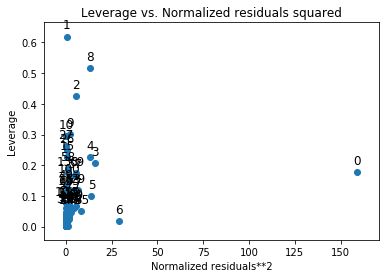

In [99]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [100]:
#Dropping outliers and redefining dependent variables 
df_opti = df[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']].drop([0,3,4,6,5,10,177,193,7,26])
y_posts_opti = y_posts.drop([0,3,4,6,5,10,177,193,7,26])
y_values_opti = y_values.drop([0,3,4,6,5,10,177,193,7,26])
y_indiv_p_opti = y_indiv_posts.drop([0,3,4,6,5,10,177,193,7,26])
y_indiv_v_opti = y_indiv_value.drop([0,3,4,6,5,10,177,193,7,26])
y_emp_p_opti = y_emp_posts.drop([0,3,4,6,5,10,177,193,7,26])
y_emp_v_opti = y_emp_value.drop([0,3,4,6,5,10,177,193,7,26])

In [101]:
#Optimal combination (edited) - general
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_posts_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     234.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          2.21e-136
Time:                        18:01:21   Log-Likelihood:                -2229.4
No. Observations:                 363   AIC:                             4477.
Df Residuals:                     354   BIC:                             4512.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               25.9843      6.483      4.008      0.000      13.235      38.734
Total_Insta_Likes                    0.8186      0.175      4.690      0.000       0.475       1.162
Total_FB_Reach                       0.0137      0.006      2.217      0.027       0.002       0.026
Total_Twit_clicks                    7.1380      1.704      4.189      0.000       3.787      10.489
Total_Email_clicks                   0.2215      0.036      6.146      0.000       0.151       0.292
TV3_perday                         322.2102     20.068     16.056      0.000     282.742     361.678
@ ELNACIONAL.CAT_perday            260.3782     25.425     10.241      0.000     210.375     310.381
La Vanguardia_perday               107.7996     25.257      4.268      0.000      58.127     157.472
El Periódico de Catalunya_perday    72.1319     24.307      2.968      0.003      24.329     119.935
==============================================================================
Omnibus:                       77.484   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1205.079
Skew:                          -0.335   Prob(JB):                    2.09e-262
Kurtosis:                      11.901   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model.params

In [102]:
#Channel posts only (posts)
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_values_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.826
Model:                                 OLS   Adj. R-squared:                  0.822
Method:                      Least Squares   F-statistic:                     209.7
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):          2.60e-129
Time:                             18:01:21   Log-Likelihood:                -3740.9
No. Observations:                      363   AIC:                             7500.
Df Residuals:                          354   BIC:                             7535.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1688.8822    417.016      4.050      0.000     868.743    2509.022
Total_Insta_Likes                   46.6945     11.228      4.159      0.000      24.612      68.777
Total_FB_Reach                       1.4546      0.399      3.646      0.000       0.670       2.239
Total_Twit_clicks                  425.5601    109.614      3.882      0.000     209.984     641.136
Total_Email_clicks                  13.0833      2.319      5.642      0.000       8.523      17.644
TV3_perday                        1.786e+04   1290.930     13.835      0.000    1.53e+04    2.04e+04
@ ELNACIONAL.CAT_perday           1.671e+04   1635.510     10.216      0.000    1.35e+04    1.99e+04
La Vanguardia_perday              7475.0346   1624.707      4.601      0.000    4279.744    1.07e+04
El Periódico de Catalunya_perday  3028.4760   1563.570      1.937      0.054     -46.579    6103.531
==============================================================================
Omnibus:                       67.376   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.381
Skew:                          -0.147   Prob(JB):                    7.77e-209
Kurtosis:                      10.955   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#Optimal combination 
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_indiv_p_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.842
Model:                                           OLS   Adj. R-squared:                  0.838
Method:                                Least Squares   F-statistic:                     235.9
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):          7.99e-137
Time:                                       18:01:21   Log-Likelihood:                -2226.0
No. Observations:                                363   AIC:                             4470.
Df Residuals:                                    354   BIC:                             4505.
Df Model:                                          8                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               25.1102      6.421      3.910      0.000      12.482      37.739
Total_Insta_Likes                    0.8167      0.173      4.724      0.000       0.477       1.157
Total_FB_Reach                       0.0133      0.006      2.173      0.030       0.001       0.025
Total_Twit_clicks                    7.1620      1.688      4.243      0.000       3.843      10.482
Total_Email_clicks                   0.2210      0.036      6.190      0.000       0.151       0.291
TV3_perday                         320.4307     19.878     16.120      0.000     281.337     359.524
@ ELNACIONAL.CAT_perday            258.7241     25.184     10.273      0.000     209.195     308.253
La Vanguardia_perday               105.9741     25.018      4.236      0.000      56.772     155.176
El Periódico de Catalunya_perday    71.7251     24.076      2.979      0.003      24.375     119.075
==============================================================================
Omnibus:                       78.205   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1208.138
Skew:                          -0.353   Prob(JB):                    4.53e-263
Kurtosis:                      11.910   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#Optimal combination 
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_indiv_v_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.838
Model:                                            OLS   Adj. R-squared:                  0.834
Method:                                 Least Squares   F-statistic:                     228.5
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):          8.75e-135
Time:                                        18:01:21   Log-Likelihood:                -3712.5
No. Observations:                                 363   AIC:                             7443.
Df Residuals:                                     354   BIC:                             7478.
Df Model:                                           8                                         
Covariance Type:                            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1346.6734    385.532      3.493      0.001     588.452    2104.895
Total_Insta_Likes                   47.5830     10.380      4.584      0.000      27.168      67.998
Total_FB_Reach                       1.0766      0.369      2.919      0.004       0.351       1.802
Total_Twit_clicks                  464.8076    101.338      4.587      0.000     265.507     664.109
Total_Email_clicks                  13.4214      2.144      6.261      0.000       9.205      17.637
TV3_perday                        1.747e+04   1193.469     14.640      0.000    1.51e+04    1.98e+04
@ ELNACIONAL.CAT_perday           1.595e+04   1512.033     10.550      0.000     1.3e+04    1.89e+04
La Vanguardia_perday              6937.7040   1502.046      4.619      0.000    3983.648    9891.760
El Periódico de Catalunya_perday  3166.0388   1445.525      2.190      0.029     323.142    6008.936
==============================================================================
Omnibus:                       78.345   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.616
Skew:                          -0.461   Prob(JB):                    3.82e-212
Kurtosis:                      10.970   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#Optimal combination org quants
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_emp_p_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.402
Model:                                       OLS   Adj. R-squared:                  0.388
Method:                            Least Squares   F-statistic:                     29.73
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           2.00e-35
Time:                                   18:01:21   Log-Likelihood:                -770.54
No. Observations:                            363   AIC:                             1559.
Df Residuals:                                354   BIC:                             1594.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.8741      0.117      7.502      0.000       0.645       1.103
Total_Insta_Likes                    0.0019      0.003      0.604      0.546      -0.004       0.008
Total_FB_Reach                       0.0004      0.000      3.578      0.000       0.000       0.001
Total_Twit_clicks                   -0.0240      0.031     -0.785      0.433      -0.084       0.036
Total_Email_clicks                   0.0005      0.001      0.819      0.413      -0.001       0.002
TV3_perday                           1.7795      0.361      4.934      0.000       1.070       2.489
@ ELNACIONAL.CAT_perday              1.6541      0.457      3.620      0.000       0.755       2.553
La Vanguardia_perday                 1.8255      0.454      4.022      0.000       0.933       2.718
El Periódico de Catalunya_perday     0.4068      0.437      0.931      0.352      -0.452       1.266
==============================================================================
Omnibus:                      294.840   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6825.533
Skew:                           3.229   Prob(JB):                         0.00
Kurtosis:                      23.238   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
#Optimal combination org value
X = sm.add_constant(df_opti[['Total_Insta_Likes', 
       'Total_FB_Reach', 'Total_Twit_clicks', 'Total_Email_clicks','TV3_perday',
'@ ELNACIONAL.CAT_perday',
'La Vanguardia_perday',
'El Periódico de Catalunya_perday']])
model = sm.OLS(y_emp_v_opti, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.157
Model:                                         OLS   Adj. R-squared:                  0.138
Method:                              Least Squares   F-statistic:                     8.260
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           2.85e-10
Time:                                     18:01:21   Log-Likelihood:                -3189.9
No. Observations:                              363   AIC:                             6398.
Df Residuals:                                  354   BIC:                             6433.
Df Model:                                        8                                         
Covariance Type:                         nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              342.2088     91.386      3.745      0.000     162.480     521.937
Total_Insta_Likes                   -0.8885      2.461     -0.361      0.718      -5.728       3.951
Total_FB_Reach                       0.3780      0.087      4.323      0.000       0.206       0.550
Total_Twit_clicks                  -39.2475     24.021     -1.634      0.103     -86.490       7.995
Total_Email_clicks                  -0.3380      0.508     -0.665      0.506      -1.337       0.661
TV3_perday                         387.9006    282.899      1.371      0.171    -168.473     944.275
@ ELNACIONAL.CAT_perday            756.2899    358.411      2.110      0.036      51.406    1461.173
La Vanguardia_perday               537.3306    356.044      1.509      0.132    -162.897    1237.558
El Periódico de Catalunya_perday  -137.5629    342.646     -0.401      0.688    -811.441     536.316
==============================================================================
Omnibus:                      648.146   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           349550.230
Skew:                          10.547   Prob(JB):                         0.00
Kurtosis:                     153.552   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Isolated influence post attributes

###Instagram

In [107]:
#-------------Instagram to donations-----------------
X = sm.add_constant(df[['Total_Insta_Likes']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     130.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           4.00e-26
Time:                        18:01:21   Log-Likelihood:                -2736.2
No. Observations:                 373   AIC:                             5476.
Df Residuals:                     371   BIC:                             5484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.5043     20.101      3.458      0.001      29.978     109.031
Total_Insta_Likes     4.6954      0.411     11.430      0.000       3.888       5.503
==============================================================================
Omnibus:                      555.268   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139727.015
Skew:                           7.568   Prob(JB):                         0.00
Kurtosis:                      96.602   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

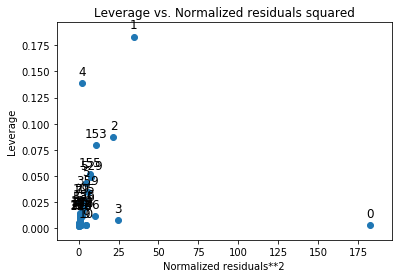

In [108]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [109]:
#Dropping outliers and redefining dependent variables 
df_I_only = df[['Total_Insta_Likes']].drop([0,3])

y_posts_I_only = y_posts.drop([0,3])
y_values_I_only = y_values.drop([0,3])
y_indiv_p_I_only = y_indiv_posts.drop([0,3])
y_indiv_v_I_only = y_indiv_value.drop([0,3])
y_emp_p_I_only = y_emp_posts.drop([0,3])
y_emp_v_I_only = y_emp_value.drop([0,3])

In [110]:
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_posts_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     284.4
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.02e-47
Time:                        18:01:22   Log-Likelihood:                -2571.5
No. Observations:                 371   AIC:                             5147.
Df Residuals:                     369   BIC:                             5155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.8668     13.440      3.859      0.000      25.439      78.295
Total_Insta_Likes     4.6354      0.275     16.865      0.000       4.095       5.176
==============================================================================
Omnibus:                      274.209   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12631.336
Skew:                           2.531   Prob(JB):                         0.00
Kurtosis:                      31.133   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#Donations values
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_values_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.416
Model:                                 OLS   Adj. R-squared:                  0.415
Method:                      Least Squares   F-statistic:                     263.1
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           4.73e-45
Time:                             18:01:22   Log-Likelihood:                -4109.5
No. Observations:                      371   AIC:                             8223.
Df Residuals:                          369   BIC:                             8231.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3348.3235    848.833      3.945      0.000    1679.168    5017.479
Total_Insta_Likes   281.5971     17.360     16.221      0.000     247.461     315.734
==============================================================================
Omnibus:                      277.741   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11587.038
Skew:                           2.621   Prob(JB):                         0.00
Kurtosis:                      29.872   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
#Inidividual posts
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_indiv_p_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.436
Model:                                           OLS   Adj. R-squared:                  0.434
Method:                                Least Squares   F-statistic:                     285.2
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           8.33e-48
Time:                                       18:01:22   Log-Likelihood:                -2568.4
No. Observations:                                371   AIC:                             5141.
Df Residuals:                                    369   BIC:                             5149.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.7907     13.331      3.810      0.000      24.577      77.005
Total_Insta_Likes     4.6038      0.273     16.886      0.000       4.068       5.140
==============================================================================
Omnibus:                      275.789   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12919.999
Skew:                           2.549   Prob(JB):                         0.00
Kurtosis:                      31.457   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#Individual Values
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_indiv_v_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.426
Model:                                            OLS   Adj. R-squared:                  0.425
Method:                                 Least Squares   F-statistic:                     274.0
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           2.03e-46
Time:                                        18:01:22   Log-Likelihood:                -4088.3
No. Observations:                                 371   AIC:                             8181.
Df Residuals:                                     369   BIC:                             8188.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2945.5216    801.608      3.675      0.000    1369.228    4521.815
Total_Insta_Likes   271.3488     16.394     16.552      0.000     239.111     303.586
==============================================================================
Omnibus:                      287.062   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13934.329
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      32.532   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Organizational quantity
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_emp_p_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.179
Model:                                       OLS   Adj. R-squared:                  0.176
Method:                            Least Squares   F-statistic:                     80.30
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.63e-17
Time:                                   18:01:22   Log-Likelihood:                -955.90
No. Observations:                            371   AIC:                             1916.
Df Residuals:                                369   BIC:                             1924.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0761      0.173      6.233      0.000       0.737       1.416
Total_Insta_Likes     0.0316      0.004      8.961      0.000       0.025       0.039
==============================================================================
Omnibus:                      443.770   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42296.572
Skew:                           5.338   Prob(JB):                         0.00
Kurtosis:                      54.207   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#Organizational Values
X = sm.add_constant(df_I_only[['Total_Insta_Likes']])
model = sm.OLS(y_emp_v_I_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.058
Model:                                         OLS   Adj. R-squared:                  0.056
Method:                              Least Squares   F-statistic:                     22.79
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           2.61e-06
Time:                                     18:01:22   Log-Likelihood:                -3334.0
No. Observations:                              371   AIC:                             6672.
Df Residuals:                                  369   BIC:                             6680.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               402.8018    104.969      3.837      0.000     196.388     609.215
Total_Insta_Likes    10.2483      2.147      4.774      0.000       6.027      14.470
==============================================================================
Omnibus:                      577.250   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136821.768
Skew:                           8.316   Prob(JB):                         0.00
Kurtosis:                      95.598   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Facebook

In [116]:
#Facebook to donations
X = sm.add_constant(df[['Total_FB_Reach']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     209.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.49e-38
Time:                        18:01:22   Log-Likelihood:                -2709.1
No. Observations:                 373   AIC:                             5422.
Df Residuals:                     371   BIC:                             5430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.3103     18.402      4.038      0.000      38.126     110.495
Total_FB_Reach     0.1855      0.013     14.464      0.000       0.160       0.211
==============================================================================
Omnibus:                      439.920   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67508.392
Skew:                           4.982   Prob(JB):                         0.00
Kurtosis:                      68.149   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

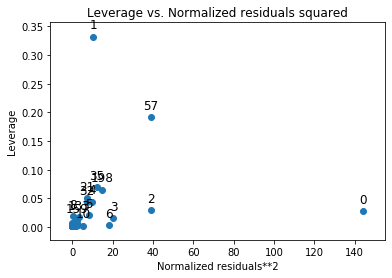

In [117]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [118]:
#Dropping outliers and redefining dependent variables 
df_fb_only = df[['Total_FB_Reach']].drop([0,2,3,6])

y_posts_fb_only = y_posts.drop([0,2,3,6])
y_values_fb_only = y_values.drop([0,2,3,6])
y_indiv_p_fb_only = y_indiv_posts.drop([0,2,3,6])
y_indiv_v_fb_only = y_indiv_value.drop([0,2,3,6])
y_emp_p_fb_only = y_emp_posts.drop([0,2,3,6])
y_emp_v_fb_only = y_emp_value.drop([0,2,3,6])

In [119]:
#Facebook to donation quantity
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_posts_fb_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     287.0
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.73e-48
Time:                        18:01:22   Log-Likelihood:                -2495.1
No. Observations:                 369   AIC:                             4994.
Df Residuals:                     367   BIC:                             5002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             63.4324     11.165      5.681      0.000      41.477      85.388
Total_FB_Reach     0.1362      0.008     16.940      0.000       0.120       0.152
==============================================================================
Omnibus:                      248.016   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19740.096
Skew:                           1.986   Prob(JB):                         0.00
Kurtosis:                      38.611   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
#Facebook to donation value
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_values_fb_only, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.447
Model:                                 OLS   Adj. R-squared:                  0.445
Method:                      Least Squares   F-statistic:                     296.5
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           4.03e-49
Time:                             18:01:22   Log-Likelihood:                -4022.4
No. Observations:                      369   AIC:                             8049.
Df Residuals:                          367   BIC:                             8057.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3940.4414    700.623      5.624      0.000    2562.702    5318.181
Total_FB_Reach     8.6886      0.505     17.218      0.000       7.696       9.681
==============================================================================
Omnibus:                      257.651   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20648.989
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      39.402   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
#Facebook to indidividual donation quantity
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_indiv_p_fb_only, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.439
Model:                                           OLS   Adj. R-squared:                  0.437
Method:                                Least Squares   F-statistic:                     286.7
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           6.11e-48
Time:                                       18:01:23   Log-Likelihood:                -2492.3
No. Observations:                                369   AIC:                             4989.
Df Residuals:                                    367   BIC:                             4996.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             62.3233     11.082      5.624      0.000      40.532      84.115
Total_FB_Reach     0.1352      0.008     16.933      0.000       0.119       0.151
==============================================================================
Omnibus:                      249.071   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20087.792
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                      38.925   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
#Facebook to individual donation value
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_indiv_v_fb_only, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.440
Model:                                            OLS   Adj. R-squared:                  0.439
Method:                                 Least Squares   F-statistic:                     288.5
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           3.69e-48
Time:                                        18:01:23   Log-Likelihood:                -4006.1
No. Observations:                                 369   AIC:                             8016.
Df Residuals:                                     367   BIC:                             8024.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3569.4972    670.335      5.325      0.000    2251.318    4887.676
Total_FB_Reach     8.2010      0.483     16.986      0.000       7.252       9.150
==============================================================================
Omnibus:                      259.468   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20838.353
Skew:                           2.142   Prob(JB):                         0.00
Kurtosis:                      39.565   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#Facebook to organizational donation quantity
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_emp_p_fb_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.197
Model:                                       OLS   Adj. R-squared:                  0.195
Method:                            Least Squares   F-statistic:                     90.31
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           2.72e-19
Time:                                   18:01:23   Log-Likelihood:                -920.67
No. Observations:                            369   AIC:                             1845.
Df Residuals:                                367   BIC:                             1853.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1091      0.157      7.081      0.000       0.801       1.417
Total_FB_Reach     0.0011      0.000      9.503      0.000       0.001       0.001
==============================================================================
Omnibus:                      526.486   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111737.225
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      87.088   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
#Facebook to organizational donation value
X = sm.add_constant(df_fb_only[['Total_FB_Reach']])
model = sm.OLS(y_emp_v_fb_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.116
Model:                                         OLS   Adj. R-squared:                  0.114
Method:                              Least Squares   F-statistic:                     48.24
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           1.72e-11
Time:                                     18:01:23   Log-Likelihood:                -3294.6
No. Observations:                              369   AIC:                             6593.
Df Residuals:                                  367   BIC:                             6601.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            370.9442     97.480      3.805      0.000     179.254     562.634
Total_FB_Reach     0.4876      0.070      6.946      0.000       0.350       0.626
==============================================================================
Omnibus:                      587.350   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153893.761
Skew:                           8.649   Prob(JB):                         0.00
Kurtosis:                     101.540   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Twitter

In [125]:
#Twitter to donations
X = sm.add_constant(df[['Total_Twit_clicks']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     139.0
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.84e-27
Time:                        18:01:23   Log-Likelihood:                -2733.1
No. Observations:                 373   AIC:                             5470.
Df Residuals:                     371   BIC:                             5478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                70.4091     19.879      3.542      0.000      31.319     109.499
Total_Twit_clicks    50.1699      4.256     11.789      0.000      41.802      58.538
==============================================================================
Omnibus:                      418.570   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26254.489
Skew:                           4.954   Prob(JB):                         0.00
Kurtosis:                      42.889   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

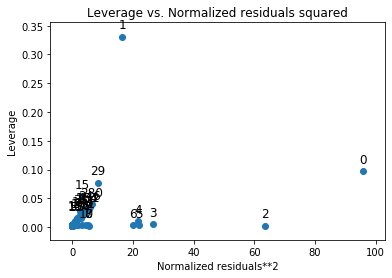

In [126]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [127]:
#Dropping outliers and redefining dependent variables 
df_t_only = df[['Total_Twit_clicks']].drop([2,3,4,5,6])

y_posts_t_only = y_posts.drop([2,3,4,5,6])
y_values_t_only = y_values.drop([2,3,4,5,6])
y_indiv_p_t_only = y_indiv_posts.drop([2,3,4,5,6])
y_indiv_v_t_only = y_indiv_value.drop([2,3,4,5,6])
y_emp_p_t_only = y_emp_posts.drop([2,3,4,5,6])
y_emp_v_t_only = y_emp_value.drop([2,3,4,5,6])

In [128]:
#Twitter to donation quantity
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_posts_t_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           9.28e-38
Time:                        18:01:23   Log-Likelihood:                -2598.9
No. Observations:                 368   AIC:                             5202.
Df Residuals:                     366   BIC:                             5210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                46.8470     15.326      3.057      0.002      16.708      76.986
Total_Twit_clicks    47.4422      3.283     14.449      0.000      40.985      53.899
==============================================================================
Omnibus:                      500.569   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109217.414
Skew:                           6.357   Prob(JB):                         0.00
Kurtosis:                      86.434   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
#Twitter to donation value
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_values_t_only, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.371
Model:                                 OLS   Adj. R-squared:                  0.369
Method:                      Least Squares   F-statistic:                     215.6
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.07e-38
Time:                             18:01:23   Log-Likelihood:                -4093.7
No. Observations:                      368   AIC:                             8191.
Df Residuals:                          366   BIC:                             8199.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3027.7125    890.289      3.401      0.001    1276.989    4778.436
Total_Twit_clicks  2800.3402    190.731     14.682      0.000    2425.274    3175.407
==============================================================================
Omnibus:                      441.522   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59273.983
Skew:                           5.193   Prob(JB):                         0.00
Kurtosis:                      64.301   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#Twitter to indidividual donation quantity
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_indiv_p_t_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.364
Model:                                           OLS   Adj. R-squared:                  0.362
Method:                                Least Squares   F-statistic:                     209.4
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           7.68e-38
Time:                                       18:01:23   Log-Likelihood:                -2596.7
No. Observations:                                368   AIC:                             5197.
Df Residuals:                                    366   BIC:                             5205.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                45.7655     15.235      3.004      0.003      15.806      75.725
Total_Twit_clicks    47.2258      3.264     14.469      0.000      40.808      53.644
==============================================================================
Omnibus:                      501.454   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110210.370
Skew:                           6.376   Prob(JB):                         0.00
Kurtosis:                      86.815   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#Twitter to individual donation value
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_indiv_v_t_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.378
Model:                                            OLS   Adj. R-squared:                  0.377
Method:                                 Least Squares   F-statistic:                     222.7
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           1.14e-39
Time:                                        18:01:23   Log-Likelihood:                -4082.0
No. Observations:                                 368   AIC:                             8168.
Df Residuals:                                     366   BIC:                             8176.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2611.9593    862.399      3.029      0.003     916.080    4307.839
Total_Twit_clicks  2757.0032    184.756     14.922      0.000    2393.686    3120.320
==============================================================================
Omnibus:                      455.702   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69294.444
Skew:                           5.454   Prob(JB):                         0.00
Kurtosis:                      69.334   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#Twitter to organizational donation quantity
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_emp_p_t_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.131
Model:                                       OLS   Adj. R-squared:                  0.129
Method:                            Least Squares   F-statistic:                     55.31
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           7.40e-13
Time:                                   18:01:23   Log-Likelihood:                -859.82
No. Observations:                            368   AIC:                             1724.
Df Residuals:                                366   BIC:                             1731.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0815      0.136      7.962      0.000       0.814       1.349
Total_Twit_clicks     0.2164      0.029      7.437      0.000       0.159       0.274
==============================================================================
Omnibus:                      303.233   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5720.830
Skew:                           3.408   Prob(JB):                         0.00
Kurtosis:                      21.073   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
#Twitter to organizational donation value
X = sm.add_constant(df_t_only[['Total_Twit_clicks']])
model = sm.OLS(y_emp_v_t_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.013
Model:                                         OLS   Adj. R-squared:                  0.011
Method:                              Least Squares   F-statistic:                     4.929
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):             0.0270
Time:                                     18:01:23   Log-Likelihood:                -3254.9
No. Observations:                              368   AIC:                             6514.
Df Residuals:                                  366   BIC:                             6522.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               415.7532     91.111      4.563      0.000     236.586     594.920
Total_Twit_clicks    43.3370     19.519      2.220      0.027       4.953      81.721
==============================================================================
Omnibus:                      641.752   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           303539.820
Skew:                          10.123   Prob(JB):                         0.00
Kurtosis:                     142.234   Cond. No.                         4.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###TV3

In [134]:
#TV3 to donations
X = sm.add_constant(df[['TV3_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     185.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.42e-34
Time:                        18:01:24   Log-Likelihood:                -2716.8
No. Observations:                 373   AIC:                             5438.
Df Residuals:                     371   BIC:                             5445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.4585     18.634      4.640      0.000      49.817     123.100
TV3_perday   582.0956     42.710     13.629      0.000     498.111     666.080
==============================================================================
Omnibus:                      510.286   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87703.741
Skew:                           6.571   Prob(JB):                         0.00
Kurtosis:                      76.962   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

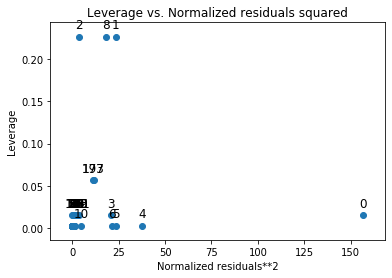

In [135]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [136]:
#Dropping outliers and redefining dependent variables 
df_tv_only = df[['TV3_perday']].drop([0,3,4,5,6])

y_posts_tv_only = y_posts.drop([0,3,4,5,6])
y_values_tv_only = y_values.drop([0,3,4,5,6])
y_indiv_p_tv_only = y_indiv_posts.drop([0,3,4,5,6])
y_indiv_v_tv_only = y_indiv_value.drop([0,3,4,5,6])
y_emp_p_tv_only = y_emp_posts.drop([0,3,4,5,6])
y_emp_v_tv_only = y_emp_value.drop([0,3,4,5,6])

In [137]:
#TV3 to donation quantity
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_posts_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     470.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.13e-67
Time:                        18:01:24   Log-Likelihood:                -2452.8
No. Observations:                 368   AIC:                             4910.
Df Residuals:                     366   BIC:                             4917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.1973     10.091      6.064      0.000      41.353      81.042
TV3_perday   505.4968     23.305     21.691      0.000     459.668     551.325
==============================================================================
Omnibus:                      284.225   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32414.137
Skew:                           2.392   Prob(JB):                         0.00
Kurtosis:                      48.728   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
#TV3 to donation value
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_values_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.539
Model:                                 OLS   Adj. R-squared:                  0.538
Method:                      Least Squares   F-statistic:                     428.5
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.44e-63
Time:                             18:01:24   Log-Likelihood:                -3977.2
No. Observations:                      368   AIC:                             7958.
Df Residuals:                          366   BIC:                             7966.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3886.5420    635.421      6.116      0.000    2637.007    5136.077
TV3_perday  3.037e+04   1467.442     20.699      0.000    2.75e+04    3.33e+04
==============================================================================
Omnibus:                      297.332   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34873.905
Skew:                           2.579   Prob(JB):                         0.00
Kurtosis:                      50.411   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#TV3 to indidividual donation quantity
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_indiv_p_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.562
Model:                                           OLS   Adj. R-squared:                  0.561
Method:                                Least Squares   F-statistic:                     470.4
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           1.15e-67
Time:                                       18:01:24   Log-Likelihood:                -2450.3
No. Observations:                                368   AIC:                             4905.
Df Residuals:                                    366   BIC:                             4912.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.1135     10.025      5.997      0.000      40.400      79.827
TV3_perday   502.1117     23.151     21.689      0.000     456.586     547.637
==============================================================================
Omnibus:                      286.463   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33118.452
Skew:                           2.421   Prob(JB):                         0.00
Kurtosis:                      49.222   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#TV3 to individual donation value
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_indiv_v_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.541
Model:                                            OLS   Adj. R-squared:                  0.540
Method:                                 Least Squares   F-statistic:                     431.2
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           7.59e-64
Time:                                        18:01:24   Log-Likelihood:                -3961.1
No. Observations:                                 368   AIC:                             7926.
Df Residuals:                                     366   BIC:                             7934.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3496.2545    608.127      5.749      0.000    2300.394    4692.115
TV3_perday  2.916e+04   1404.408     20.766      0.000    2.64e+04    3.19e+04
==============================================================================
Omnibus:                      318.935   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43775.601
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      56.124   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#TV3 to empresa donation quantity
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_emp_p_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.293
Model:                                       OLS   Adj. R-squared:                  0.291
Method:                            Least Squares   F-statistic:                     151.8
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           2.04e-29
Time:                                   18:01:24   Log-Likelihood:                -818.64
No. Observations:                            368   AIC:                             1641.
Df Residuals:                                366   BIC:                             1649.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0838      0.119      9.109      0.000       0.850       1.318
TV3_perday     3.3851      0.275     12.320      0.000       2.845       3.925
==============================================================================
Omnibus:                      248.068   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4630.497
Skew:                           2.518   Prob(JB):                         0.00
Kurtosis:                      19.632   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#TV3 to empresa donation value
X = sm.add_constant(df_tv_only[['TV3_perday']])
model = sm.OLS(y_emp_v_tv_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.087
Model:                                         OLS   Adj. R-squared:                  0.085
Method:                              Least Squares   F-statistic:                     35.04
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           7.42e-09
Time:                                     18:01:24   Log-Likelihood:                -3252.1
No. Observations:                              368   AIC:                             6508.
Df Residuals:                                  366   BIC:                             6516.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        390.2875     88.570      4.407      0.000     216.117     564.458
TV3_perday  1210.8647    204.544      5.920      0.000     808.636    1613.094
==============================================================================
Omnibus:                      642.843   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           322115.932
Skew:                          10.126   Prob(JB):                         0.00
Kurtosis:                     146.518   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###PERIODICO

In [143]:
#periodico to donations
X = sm.add_constant(df[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     31.82
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.36e-08
Time:                        18:01:24   Log-Likelihood:                -2777.1
No. Observations:                 373   AIC:                             5558.
Df Residuals:                     371   BIC:                             5566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              107.3278     22.052      4.867      0.000      63.966     150.690
El Periódico de Catalunya_perday   446.1194     79.086      5.641      0.000     290.607     601.632
==============================================================================
Omnibus:                      531.029   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70554.825
Skew:                           7.259   Prob(JB):                         0.00
Kurtosis:                      68.795   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

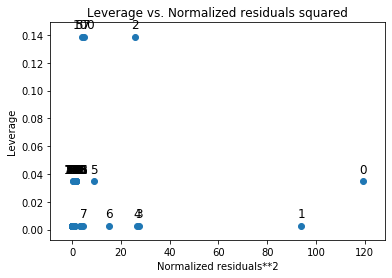

In [144]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [145]:
#Dropping outliers and redefining dependent variables 
df_nac_only = df[['El Periódico de Catalunya_perday']].drop([0,1,3,4,5,6,7])

y_posts_nac_only = y_posts.drop([0,1,3,4,5,6,7])
y_values_nac_only = y_values.drop([0,1,3,4,5,6,7])
y_indiv_p_nac_only = y_indiv_posts.drop([0,1,3,4,5,6,7])
y_indiv_v_nac_only = y_indiv_value.drop([0,1,3,4,5,6,7])
y_emp_p_nac_only = y_emp_posts.drop([0,1,3,4,5,6,7])
y_emp_v_nac_only = y_emp_value.drop([0,1,3,4,5,6,7])


In [146]:
#Periodico to donation quantity
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_posts_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     54.64
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.00e-12
Time:                        18:01:25   Log-Likelihood:                -2415.2
No. Observations:                 366   AIC:                             4834.
Df Residuals:                     364   BIC:                             4842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               72.7439      9.527      7.635      0.000      54.009      91.479
El Periódico de Catalunya_perday   259.2733     35.077      7.392      0.000     190.295     328.252
==============================================================================
Omnibus:                      582.229   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191192.459
Skew:                           8.492   Prob(JB):                         0.00
Kurtosis:                     113.674   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
#NACIO DIGITAL to donation value
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_values_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.120
Model:                                 OLS   Adj. R-squared:                  0.117
Method:                      Least Squares   F-statistic:                     49.45
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.01e-11
Time:                             18:01:25   Log-Likelihood:                -3919.1
No. Observations:                      366   AIC:                             7842.
Df Residuals:                          364   BIC:                             7850.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             4592.2832    580.092      7.916      0.000    3451.531    5733.036
El Periódico de Catalunya_perday  1.502e+04   2135.775      7.032      0.000    1.08e+04    1.92e+04
==============================================================================
Omnibus:                      545.661   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134669.961
Skew:                           7.569   Prob(JB):                         0.00
Kurtosis:                      95.745   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#NACIO DIGITAL to indidividual donation quantity
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_indiv_p_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.131
Model:                                           OLS   Adj. R-squared:                  0.128
Method:                                Least Squares   F-statistic:                     54.71
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           9.72e-13
Time:                                       18:01:25   Log-Likelihood:                -2412.0
No. Observations:                                366   AIC:                             4828.
Df Residuals:                                    364   BIC:                             4836.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               71.5920      9.445      7.580      0.000      53.019      90.165
El Periódico de Catalunya_perday   257.2062     34.773      7.397      0.000     188.825     325.588
==============================================================================
Omnibus:                      583.436   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193174.709
Skew:                           8.525   Prob(JB):                         0.00
Kurtosis:                     114.250   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#NACIO DIGITAL to individual donation value
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_indiv_v_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.124
Model:                                            OLS   Adj. R-squared:                  0.122
Method:                                 Least Squares   F-statistic:                     51.61
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           3.85e-12
Time:                                        18:01:25   Log-Likelihood:                -3893.8
No. Observations:                                 366   AIC:                             7792.
Df Residuals:                                     364   BIC:                             7799.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             4168.2010    541.382      7.699      0.000    3103.572    5232.830
El Periódico de Catalunya_perday  1.432e+04   1993.253      7.184      0.000    1.04e+04    1.82e+04
==============================================================================
Omnibus:                      560.092   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154612.850
Skew:                           7.925   Prob(JB):                         0.00
Kurtosis:                     102.435   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
#NACIO DIGITAL to empresa donation quantity
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_emp_p_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.052
Model:                                       OLS   Adj. R-squared:                  0.049
Method:                            Least Squares   F-statistic:                     19.90
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.09e-05
Time:                                   18:01:25   Log-Likelihood:                -831.57
No. Observations:                            366   AIC:                             1667.
Df Residuals:                                364   BIC:                             1675.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.1519      0.126      9.153      0.000       0.904       1.399
El Periódico de Catalunya_perday     2.0670      0.463      4.461      0.000       1.156       2.978
==============================================================================
Omnibus:                      348.212   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10115.987
Skew:                           4.049   Prob(JB):                         0.00
Kurtosis:                      27.450   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
#NACIO DIGITAL to empresa donation value
X = sm.add_constant(df_nac_only[['El Periódico de Catalunya_perday']])
model = sm.OLS(y_emp_v_nac_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.012
Model:                                         OLS   Adj. R-squared:                  0.009
Method:                              Least Squares   F-statistic:                     4.298
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):             0.0389
Time:                                     18:01:25   Log-Likelihood:                -3243.4
No. Observations:                              366   AIC:                             6491.
Df Residuals:                                  364   BIC:                             6499.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              424.0822     91.559      4.632      0.000     244.031     604.134
El Periódico de Catalunya_perday   698.8942    337.101      2.073      0.039      35.983    1361.805
==============================================================================
Omnibus:                      628.986   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269314.995
Skew:                           9.851   Prob(JB):                         0.00
Kurtosis:                     134.422   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###VANGUARDIA

In [152]:
#VANGUARDIA to donations
X = sm.add_constant(df[['La Vanguardia_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     27.49
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.66e-07
Time:                        18:01:25   Log-Likelihood:                -2779.1
No. Observations:                 373   AIC:                             5562.
Df Residuals:                     371   BIC:                             5570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  112.9846     22.020      5.131      0.000      69.684     156.285
La Vanguardia_perday   388.1310     74.033      5.243      0.000     242.554     533.708
==============================================================================
Omnibus:                      547.805   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76732.938
Skew:                           7.692   Prob(JB):                         0.00
Kurtosis:                      71.561   Cond. No.                         3.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

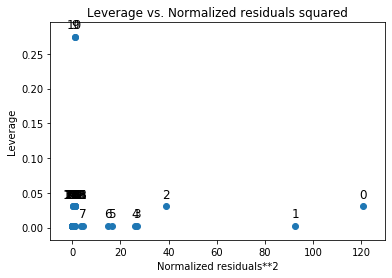

In [153]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [154]:
#Dropping outliers and redefining dependent variables 
df_vg_only = df[['La Vanguardia_perday']].drop([0,1,2,3,4,5,6,7,8,12])

y_posts_vg_only = y_posts.drop([0,1,2,3,4,5,6,7,8,12])
y_values_vg_only = y_values.drop([0,1,2,3,4,5,6,7,8,12])
y_indiv_p_vg_only = y_indiv_posts.drop([0,1,2,3,4,5,6,7,8,12])
y_indiv_v_vg_only = y_indiv_value.drop([0,1,2,3,4,5,6,7,8,12])
y_emp_p_vg_only = y_emp_posts.drop([0,1,2,3,4,5,6,7,8,12])
y_emp_v_vg_only = y_emp_value.drop([0,1,2,3,4,5,6,7,8,12])

In [155]:
#VANGUARDIA to donation quantity
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_posts_vg_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.42e-32
Time:                        18:01:25   Log-Likelihood:                -2096.4
No. Observations:                 363   AIC:                             4197.
Df Residuals:                     361   BIC:                             4205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.0521      4.171     15.836      0.000      57.850      74.255
La Vanguardia_perday   185.1616     14.273     12.973      0.000     157.094     213.230
==============================================================================
Omnibus:                      146.892   Durbin-Watson:                   0.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.668
Skew:                           1.706   Prob(JB):                    7.70e-145
Kurtosis:                       8.678   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
#VANGUARDIA to donation value
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_values_vg_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.280
Model:                                 OLS   Adj. R-squared:                  0.278
Method:                      Least Squares   F-statistic:                     140.7
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.26e-27
Time:                             18:01:25   Log-Likelihood:                -3633.2
No. Observations:                      363   AIC:                             7270.
Df Residuals:                          361   BIC:                             7278.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4145.4447    287.634     14.412      0.000    3579.797    4711.092
La Vanguardia_perday  1.167e+04    984.265     11.861      0.000    9738.437    1.36e+04
==============================================================================
Omnibus:                      153.129   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.202
Skew:                           1.821   Prob(JB):                    1.07e-141
Kurtosis:                       8.445   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
#VANGUARDIA to indidividual donation quantity
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_indiv_p_vg_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.319
Model:                                           OLS   Adj. R-squared:                  0.317
Method:                                Least Squares   F-statistic:                     169.4
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           5.13e-32
Time:                                       18:01:25   Log-Likelihood:                -2091.9
No. Observations:                                363   AIC:                             4188.
Df Residuals:                                    361   BIC:                             4196.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   64.9784      4.120     15.773      0.000      56.877      73.080
La Vanguardia_perday   183.4648     14.097     13.015      0.000     155.742     211.187
==============================================================================
Omnibus:                      147.602   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.635
Skew:                           1.707   Prob(JB):                    2.63e-148
Kurtosis:                       8.769   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
#VANGUARDIA to individual donation value
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_indiv_v_vg_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.317
Model:                                            OLS   Adj. R-squared:                  0.315
Method:                                 Least Squares   F-statistic:                     167.4
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           1.03e-31
Time:                                        18:01:25   Log-Likelihood:                -3589.8
No. Observations:                                 363   AIC:                             7184.
Df Residuals:                                     361   BIC:                             7191.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3747.0448    255.212     14.682      0.000    3245.156    4248.933
La Vanguardia_perday   1.13e+04    873.320     12.937      0.000    9580.475     1.3e+04
==============================================================================
Omnibus:                      137.701   Durbin-Watson:                   0.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.138
Skew:                           1.633   Prob(JB):                    1.27e-120
Kurtosis:                       8.084   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
#VANGUARDIA to organization donation quantity
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_emp_p_vg_only, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.062
Model:                                       OLS   Adj. R-squared:                  0.060
Method:                            Least Squares   F-statistic:                     24.01
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.45e-06
Time:                                   18:01:25   Log-Likelihood:                -746.48
No. Observations:                            363   AIC:                             1497.
Df Residuals:                                361   BIC:                             1505.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0737      0.101     10.610      0.000       0.875       1.273
La Vanguardia_perday     1.6967      0.346      4.900      0.000       1.016       2.378
==============================================================================
Omnibus:                      325.633   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9379.421
Skew:                           3.674   Prob(JB):                         0.00
Kurtosis:                      26.794   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
#VANGUARDIA to organization donation value
X = sm.add_constant(df_vg_only[['La Vanguardia_perday']])
model = sm.OLS(y_emp_v_vg_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.005
Model:                                         OLS   Adj. R-squared:                  0.002
Method:                              Least Squares   F-statistic:                     1.649
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):              0.200
Time:                                     18:01:25   Log-Likelihood:                -3193.2
No. Observations:                              363   AIC:                             6390.
Df Residuals:                                  361   BIC:                             6398.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  398.3999     85.603      4.654      0.000     230.057     566.743
La Vanguardia_perday   376.1420    292.928      1.284      0.200    -199.917     952.201
==============================================================================
Omnibus:                      676.043   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445662.960
Skew:                          11.457   Prob(JB):                         0.00
Kurtosis:                     173.118   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###NACIONAL

In [161]:
#NACIONAL to donations
#VANGUARDIA to donations
#TV3 to donations
X = sm.add_constant(df[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_posts, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     82.80
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.64e-18
Time:                        18:01:25   Log-Likelihood:                -2754.9
No. Observations:                 373   AIC:                             5514.
Df Residuals:                     371   BIC:                             5522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     105.4242     20.518      5.138      0.000      65.078     145.770
@ ELNACIONAL.CAT_perday   577.4087     63.453      9.100      0.000     452.635     702.182
==============================================================================
Omnibus:                      536.375   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97117.543
Skew:                           7.228   Prob(JB):                         0.00
Kurtosis:                      80.717   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

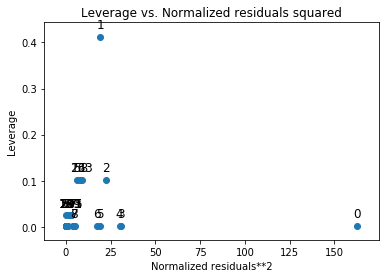

In [162]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [163]:
#Dropping outliers and redefining dependent variables 
df_ncl_only = df[['@ ELNACIONAL.CAT_perday']].drop([0,2,3,4,5,6])

y_posts_ncl_only = y_posts.drop([0,2,3,4,5,6])
y_values_ncl_only = y_values.drop([0,2,3,4,5,6])
y_indiv_p_ncl_only = y_indiv_posts.drop([0,2,3,4,5,6])
y_indiv_v_ncl_only = y_indiv_value.drop([0,2,3,4,5,6])
y_emp_p_ncl_only = y_emp_posts.drop([0,2,3,4,5,6])
y_emp_v_ncl_only = y_emp_value.drop([0,2,3,4,5,6])

In [164]:
#NACIONAL to donation quantity
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_posts_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Donations_posts   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     228.4
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.01e-40
Time:                        18:01:26   Log-Likelihood:                -2444.1
No. Observations:                 367   AIC:                             4892.
Df Residuals:                     365   BIC:                             4900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      70.1913      9.995      7.023      0.000      50.537      89.846
@ ELNACIONAL.CAT_perday   489.1642     32.365     15.114      0.000     425.520     552.809
==============================================================================
Omnibus:                      358.916   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35791.648
Skew:                           3.679   Prob(JB):                         0.00
Kurtosis:                      50.817   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#NACIONAL to donation value
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_values_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Total_Value_Dons_on_Day   R-squared:                       0.401
Model:                                 OLS   Adj. R-squared:                  0.399
Method:                      Least Squares   F-statistic:                     244.1
Date:                     Fri, 24 Sep 2021   Prob (F-statistic):           1.68e-42
Time:                             18:01:26   Log-Likelihood:                -3957.7
No. Observations:                      367   AIC:                             7919.
Df Residuals:                          365   BIC:                             7927.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4355.2560    618.004      7.047      0.000    3139.961    5570.551
@ ELNACIONAL.CAT_perday  3.127e+04   2001.198     15.625      0.000    2.73e+04    3.52e+04
==============================================================================
Omnibus:                      338.812   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29641.923
Skew:                           3.374   Prob(JB):                         0.00
Kurtosis:                      46.508   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
#NACIONAL to indidividual donation quantity
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_indiv_p_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Individuals_donations_posts_posts   R-squared:                       0.385
Model:                                           OLS   Adj. R-squared:                  0.384
Method:                                Least Squares   F-statistic:                     228.8
Date:                               Fri, 24 Sep 2021   Prob (F-statistic):           1.77e-40
Time:                                       18:01:26   Log-Likelihood:                -2441.6
No. Observations:                                367   AIC:                             4887.
Df Residuals:                                    365   BIC:                             4895.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      69.0326      9.929      6.953      0.000      49.508      88.557
@ ELNACIONAL.CAT_perday   486.3556     32.150     15.128      0.000     423.132     549.579
==============================================================================
Omnibus:                      360.032   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36454.776
Skew:                           3.693   Prob(JB):                         0.00
Kurtosis:                      51.264   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#NACIONAL to individual donation value
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_indiv_v_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total_Value_Individual_Dons_on_Day   R-squared:                       0.399
Model:                                            OLS   Adj. R-squared:                  0.398
Method:                                 Least Squares   F-statistic:                     242.5
Date:                                Fri, 24 Sep 2021   Prob (F-statistic):           2.75e-42
Time:                                        18:01:26   Log-Likelihood:                -3944.0
No. Observations:                                 367   AIC:                             7892.
Df Residuals:                                     365   BIC:                             7900.
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3951.3345    595.341      6.637      0.000    2780.606    5122.063
@ ELNACIONAL.CAT_perday  3.002e+04   1927.812     15.572      0.000    2.62e+04    3.38e+04
==============================================================================
Omnibus:                      352.290   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36855.008
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      51.580   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
#NACIONAL to organization donation quantity
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_emp_p_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Empresa_donations_posts_posts   R-squared:                       0.129
Model:                                       OLS   Adj. R-squared:                  0.127
Method:                            Least Squares   F-statistic:                     54.02
Date:                           Fri, 24 Sep 2021   Prob (F-statistic):           1.31e-12
Time:                                   18:01:26   Log-Likelihood:                -814.93
No. Observations:                            367   AIC:                             1634.
Df Residuals:                                365   BIC:                             1642.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1587      0.118      9.819      0.000       0.927       1.391
@ ELNACIONAL.CAT_perday     2.8086      0.382      7.350      0.000       2.057       3.560
==============================================================================
Omnibus:                      310.267   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6147.022
Skew:                           3.521   Prob(JB):                         0.00
Kurtosis:                      21.772   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
#NACIONAL to organization donation value
X = sm.add_constant(df_ncl_only[['@ ELNACIONAL.CAT_perday']])
model = sm.OLS(y_emp_v_ncl_only, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Total_Value Empresa_Dons_on_Day   R-squared:                       0.051
Model:                                         OLS   Adj. R-squared:                  0.048
Method:                              Least Squares   F-statistic:                     19.65
Date:                             Fri, 24 Sep 2021   Prob (F-statistic):           1.23e-05
Time:                                     18:01:26   Log-Likelihood:                -3237.7
No. Observations:                              367   AIC:                             6479.
Df Residuals:                                  365   BIC:                             6487.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     403.9216     86.876      4.649      0.000     233.082     574.761
@ ELNACIONAL.CAT_perday  1247.0381    281.318      4.433      0.000     693.831    1800.245
==============================================================================
Omnibus:                      662.616   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367100.664
Skew:                          10.822   Prob(JB):                         0.00
Kurtosis:                     156.421   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Optimizing Channels

##Instagram

In [170]:
#Importing dataset with Instagram posts and attributes
df_insta = pd.read_csv('/Users/i.p.kruyt/Desktop/ESADE/BdA/Data_Sources/Insta/insta_final_cmpgn.csv')

In [171]:
#Viewing columns to select relevant ones
df_insta.columns

Index(['Unnamed: 0', 'insta_id', 'Date', 'Post', 'Subtitle',
       'Loose donation link', 'Video', 'Donation link', 'Likes', 'Comments',
       'Total Interactions', 'Profile Visits',
       'Website Taps (on profile page)', 'Business Address Taps (in bio)',
       'Accounts Reached', 'Percentage not following BdA', 'Follows',
       'Hashtag in post (Y/N)', 'Hashtags in post', 'Emoji in post (Y/N)',
       'Number of Emojis', 'Link in post (Y/N)', 'Posted Link',
       'number of links in post', 'Collaboration (Y/N)', 'Collaboration',
       'Dominant Topic', 'Contribution %', 'Topic Terms',
       'Caption length (figures)', 'Campaign', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)'],
      dtype='object')

In [172]:
#One-hot encoding dominant topic
df_insta = pd.concat([df_insta,pd.get_dummies(df_insta['Dominant Topic'], prefix='topic')],axis=1)

#dropping the original column
df_insta.drop(['Dominant Topic'],axis=1, inplace=True)

In [173]:
#Dropping irrelevant columns for this analysis
df_insta.drop(columns=['insta_id', 'Date', 'Post', 'Subtitle',
               'Comments', 'Total Interactions',
       'Profile Visits', 'Website Taps (on profile page)',
       'Business Address Taps (in bio)', 'Accounts Reached',
       'Percentage not following BdA', 'Follows','Posted Link',
       'Collaboration', 'Contribution %', 'Topic Terms', 'Hashtags in post'], inplace = True)


In [174]:
df_insta.columns

Index(['Unnamed: 0', 'Loose donation link', 'Video', 'Donation link', 'Likes',
       'Hashtag in post (Y/N)', 'Emoji in post (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'number of links in post', 'Collaboration (Y/N)',
       'Caption length (figures)', 'Campaign', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)', 'topic_1', 'topic_2', 'topic_3',
       'topic_4'],
      dtype='object')

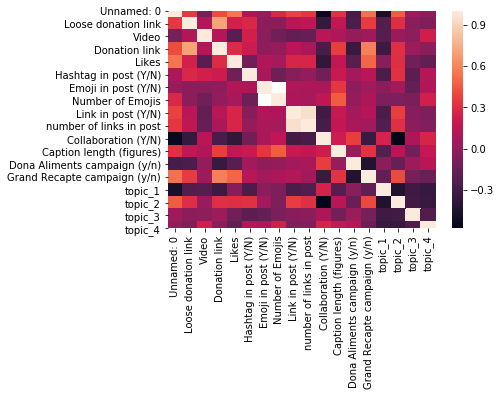

In [175]:
#Checking for multicollinearity
corrs = df_insta.corr()
sns.heatmap(corrs)

In [176]:
#Filling NaNs with 0s
df_insta = df_insta.fillna(0)

In [177]:
#Defining dependent and independent variables
y_insta = df_insta['Likes']
X_insta = sm.add_constant(df_insta[[
       'Hashtag in post (Y/N)', 
       'Collaboration (Y/N)','Caption length (figures)','topic_1', 'topic_2', 'topic_3',
       'topic_4', 'Grand Recapte campaign (y/n)']])

In [178]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_insta, X_insta).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Likes   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     4.449
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000595
Time:                        18:01:27   Log-Likelihood:                -331.76
No. Observations:                  61   AIC:                             679.5
Df Residuals:                      53   BIC:                             696.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           64.4361     17.641      3.653      0.001      29.052      99.820
Hashtag in post (Y/N)          -36.2429     17.690     -2.049      0.045     -71.724      -0.762
Collaboration (Y/N)            -41.9987     21.265     -1.975      0.053     -84.650       0.653
Caption length (figures)         0.0853      0.061      1.399      0.168      -0.037       0.208
topic_1                         25.3863     13.334      1.904      0.062      -1.358      52.130
topic_2                         23.1716     18.078      1.282      0.206     -13.088      59.432
topic_3                          5.5853     15.717      0.355      0.724     -25.938      37.109
topic_4                         10.2929     16.716      0.616      0.541     -23.234      43.820
Grand Recapte campaign (y/n)    55.0153     20.386      2.699      0.009      14.127      95.904
==============================================================================
Omnibus:                       38.883   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.662
Skew:                           1.822   Prob(JB):                     1.90e-28
Kurtosis:                       9.079   Cond. No.                     4.21e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

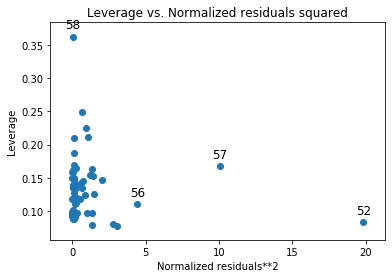

In [179]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [180]:
y_insta = y_insta.drop([52])
X_insta = X_insta.drop([52])

In [181]:
model = sm.OLS(y_insta, X_insta).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Likes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     4.747
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000353
Time:                        18:01:27   Log-Likelihood:                -313.68
No. Observations:                  60   AIC:                             643.4
Df Residuals:                      52   BIC:                             660.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           69.7207     14.343      4.861      0.000      40.940      98.501
Hashtag in post (Y/N)          -37.9424     14.351     -2.644      0.011     -66.740      -9.145
Collaboration (Y/N)            -40.1272     17.251     -2.326      0.024     -74.744      -5.511
Caption length (figures)         0.0630      0.050      1.269      0.210      -0.037       0.163
topic_1                         27.7864     10.824      2.567      0.013       6.066      49.506
topic_2                         17.8733     14.696      1.216      0.229     -11.617      47.363
topic_3                          8.6608     12.760      0.679      0.500     -16.945      34.266
topic_4                         15.4002     13.591      1.133      0.262     -11.873      42.673
Grand Recapte campaign (y/n)    46.0898     16.618      2.773      0.008      12.742      79.437
==============================================================================
Omnibus:                       27.890   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.767
Skew:                           1.405   Prob(JB):                     1.42e-14
Kurtosis:                       7.197   Cond. No.                     2.86e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Facebook

In [182]:
#Importing dataset with Instagram posts and attributes
df_fb = pd.read_csv('/Users/i.p.kruyt/Desktop/ESADE/BdA/Data_Sources/FB_Data/fb_final_cmpgn.csv')

In [183]:
#Viewing columns to select relevant ones
df_fb.head(5)
df_fb['Hour of post'] = [int(hr[:2]) for hr in df_fb['Post hour']]

In [184]:
#Dropping irrelevant columns for this analysis
df_fb.drop(columns=['Link Clicks', 'Comments', 'Shares',
                    'Contribution %', 'Topic Terms', 'Collaboration',
                    'Hashtags in post','Posted Link'], inplace = True)
df_fb.columns

Index(['Unnamed: 0', 'fb_id', 'Caption', 'Post time', 'Post hour', 'Reach',
       'Likes and Reactions', 'Hashtag in post (Y/N)', 'Number of hashtags',
       'Emoji in post (Y/N)', 'Number of Emojis', 'Link in post (Y/N)',
       'Donation Link (y/n)', 'number of links in post', 'Collaboration (Y/N)',
       'Dominant Topic', 'post length', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)',
       'Hour of post'],
      dtype='object')

In [185]:
#Filling NaNs with 0s
df_fb = df_fb.fillna(0)

In [186]:
#One-hot encoding dominant topic
df_fb = pd.concat([df_fb,pd.get_dummies(df_fb['Dominant Topic'], prefix='topic')],axis=1)

#dropping the original column
df_fb.drop(['Dominant Topic'],axis=1, inplace=True)

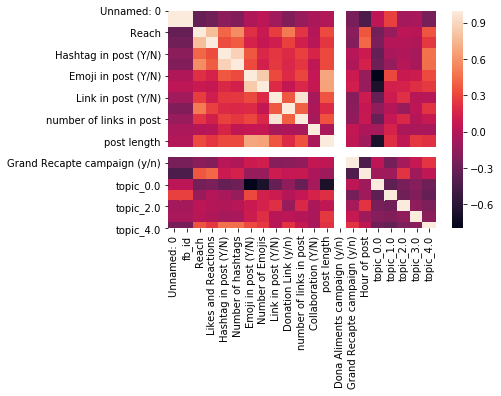

In [187]:
#Checking for multicollinearity
corrs = df_fb.corr()
sns.heatmap(corrs)


In [188]:
#Defining dependent and independent variables
y_fb = df_fb['Reach'] #See SM_to_dons analysis above
X_fb = df_fb[['Hour of post', 'Hashtag in post (Y/N)', 'Number of hashtags', 'Number of Emojis', 'Link in post (Y/N)', 'Donation Link (y/n)', 'number of links in post'
       , 'post length', 'topic_0.0', 'topic_1.0', 'topic_2.0', 'topic_3.0',
       'topic_4.0', 'Grand Recapte campaign (y/n)' ]]

In [189]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_fb, X_fb).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Reach   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     12.98
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.76e-16
Time:                        18:01:28   Log-Likelihood:                -914.26
No. Observations:                 108   AIC:                             1857.
Df Residuals:                      94   BIC:                             1894.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Hour of post                   401.7997    110.369      3.641      0.000     182.659     620.941
Hashtag in post (Y/N)        -1370.5793    610.201     -2.246      0.027   -2582.148    -159.011
Number of hashtags            1262.7363    280.517      4.501      0.000     705.762    1819.710
Number of Emojis              -255.3140    184.433     -1.384      0.170    -621.511     110.883
Link in post (Y/N)            1450.1210   1147.210      1.264      0.209    -827.691    3727.933
Donation Link (y/n)           3126.0277    556.129      5.621      0.000    2021.820    4230.235
number of links in post      -1618.0943   1021.278     -1.584      0.116   -3645.865     409.677
post length                      2.1770      0.829      2.625      0.010       0.530       3.824
topic_0.0                      554.0426    342.700      1.617      0.109    -126.396    1234.481
topic_1.0                      478.5412    422.571      1.132      0.260    -360.483    1317.565
topic_2.0                      729.8737    532.263      1.371      0.174    -326.947    1786.694
topic_3.0                      693.3665    593.468      1.168      0.246    -484.978    1871.711
topic_4.0                     1122.7490    587.280      1.912      0.059     -43.310    2288.808
Grand Recapte campaign (y/n)   -15.7004    321.880     -0.049      0.961    -654.801     623.400
==============================================================================
Omnibus:                       26.781   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.555
Skew:                           0.723   Prob(JB):                     3.97e-22
Kurtosis:                       7.451   Cond. No.                     4.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

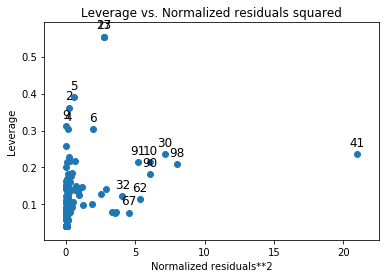

In [190]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

##Twitter

In [191]:
#Importing dataset with Instagram posts and attributes
df_twit = pd.read_csv('/Users/i.p.kruyt/Desktop/ESADE/BdA/Data_Sources/Twitter/twit_final_cmpgn.csv')

In [192]:
#Viewing columns to select relevant ones
df_twit.columns

Index(['Unnamed: 0', 'Tweet id', 'Tweet permalink', 'tweet_text', 'Post date',
       'Post hour', 'impressions', 'engagements', 'engagement rate',
       'retweets', 'replies', 'likes', 'user profile clicks', 'url clicks',
       'hashtag clicks', 'detail expands', 'permalink clicks', 'app opens',
       'app installs', 'follows', 'email tweet', 'dial phone', 'media views',
       'media engagements', 'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements', 'Promoted', 'Hashtag in post (Y/N)',
       'Number of hashtags', 'Hashtags in post', 'Coronavirus (Y/N)

In [193]:
#Dropping irrelevant columns for this analysis
df_twit.drop(columns=['Tweet id', 'Tweet permalink', 'tweet_text', 'Post date', 
                      'app opens', 'app installs',
                      'impressions', 'engagements', 'engagement rate', 'retweets', 'replies',
       'likes', 'user profile clicks', 'hashtag clicks',
       'detail expands', 'permalink clicks',
       'follows', 'email tweet', 'dial phone', 'media views',
       'media engagements', 'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements', 'Contribution %', 'Topic Terms',
       'Collaboration', 'Hashtags in post','Posted Link', 'Number of hashtags', 'Emoji in post (Y/N)'
       ], inplace = True)
df_twit.columns

Index(['Unnamed: 0', 'Post hour', 'url clicks', 'Promoted',
       'Hashtag in post (Y/N)', 'Coronavirus (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (Y/N)', 'number of links in post',
       'Collaboration (Y/N)', 'Dominant Topic', 'Campaign',
       'Dona Aliments campaign (y/n)', 'Grand Recapte campaign (y/n)'],
      dtype='object')

In [194]:
#One-hot encoding dominant topic
df_twit = pd.concat([df_twit,pd.get_dummies(df_twit['Dominant Topic'], prefix='topic')],axis=1)

#dropping the original column
df_twit.drop(['Dominant Topic'],axis=1, inplace=True)

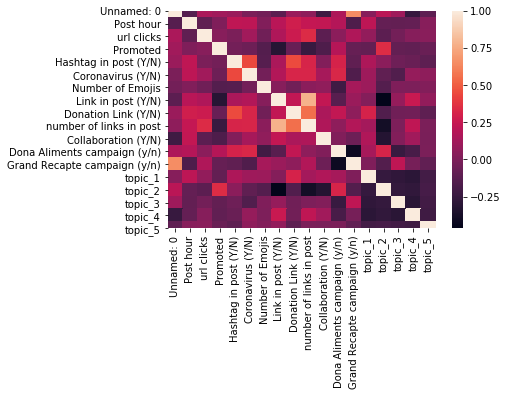

In [195]:
#Checking for multicollinearity
corrs = df_twit.corr()
sns.heatmap(corrs)

In [196]:
#Filling NaNs with 0s
df_twit = df_twit.fillna(0)

In [197]:
df_twit.columns

Index(['Unnamed: 0', 'Post hour', 'url clicks', 'Promoted',
       'Hashtag in post (Y/N)', 'Coronavirus (Y/N)', 'Number of Emojis',
       'Link in post (Y/N)', 'Donation Link (Y/N)', 'number of links in post',
       'Collaboration (Y/N)', 'Campaign', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)', 'topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5'],
      dtype='object')

In [198]:
#Defining dependent and independent variables
y_twit = df_twit['url clicks']
X_twit = sm.add_constant(df_twit[['Collaboration (Y/N)', 'Dona Aliments campaign (y/n)',
       'Grand Recapte campaign (y/n)', 'topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5','Post hour',
'Hashtag in post (Y/N)',
'Donation Link (Y/N)',
'number of links in post',
'Collaboration (Y/N)']])

In [199]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_twit, X_twit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             url clicks   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     6.763
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           6.95e-10
Time:                        18:01:29   Log-Likelihood:                -732.36
No. Observations:                 253   AIC:                             1489.
Df Residuals:                     241   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.2516      0.833      2.704      0.007       0.612       3.892
Collaboration (Y/N)             -0.8164      0.310     -2.632      0.009      -1.427      -0.205
Dona Aliments campaign (y/n)     1.0355      0.727      1.425      0.156      -0.396       2.467
Grand Recapte campaign (y/n)     1.2217      0.873      1.400      0.163      -0.498       2.941
topic_1                          0.8243      0.643      1.281      0.201      -0.443       2.091
topic_2                          0.0219      0.714      0.031      0.976      -1.385       1.428
topic_3                          0.0123      0.588      0.021      0.983      -1.147       1.171
topic_4                          0.2377      0.605      0.393      0.695      -0.954       1.430
topic_5                          1.1554      0.709      1.630      0.105      -0.241       2.552
Post hour                       -0.2063      0.071     -2.890      0.004      -0.347      -0.066
Hashtag in post (Y/N)           -1.8689      0.688     -2.715      0.007      -3.225      -0.513
Donation Link (Y/N)              2.8973      1.056      2.743      0.007       0.816       4.978
number of links in post          2.1988      0.533      4.125      0.000       1.149       3.249
Collaboration (Y/N)             -0.8164      0.310     -2.632      0.009      -1.427      -0.205
==============================================================================
Omnibus:                      269.324   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11505.162
Skew:                           4.302   Prob(JB):                         0.00
Kurtosis:                      34.896   Cond. No.                     1.09e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

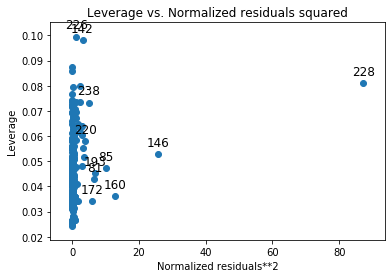

In [200]:
#Plotting outliers
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [201]:
y_twit = y_twit.drop([146,228])
X_twit = X_twit.drop([146,228])

In [202]:
#Performing and evaluating regression to find effect sizes
model = sm.OLS(y_twit, X_twit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             url clicks   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     7.345
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           8.33e-11
Time:                        18:01:30   Log-Likelihood:                -646.73
No. Observations:                 251   AIC:                             1317.
Df Residuals:                     239   BIC:                             1360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.3638      0.610      2.237      0.026       0.163       2.565
Collaboration (Y/N)             -0.7223      0.227     -3.184      0.002      -1.169      -0.275
Dona Aliments campaign (y/n)     1.0470      0.531      1.971      0.050       0.001       2.093
Grand Recapte campaign (y/n)     0.6913      0.637      1.086      0.279      -0.563       1.945
topic_1                          0.1008      0.472      0.214      0.831      -0.829       1.031
topic_2                         -0.1540      0.520     -0.296      0.767      -1.179       0.871
topic_3                          0.2353      0.428      0.549      0.583      -0.609       1.079
topic_4                          0.0795      0.442      0.180      0.857      -0.791       0.950
topic_5                          1.1022      0.516      2.135      0.034       0.085       2.119
Post hour                       -0.1104      0.052     -2.108      0.036      -0.214      -0.007
Hashtag in post (Y/N)           -1.4806      0.506     -2.926      0.004      -2.477      -0.484
Donation Link (Y/N)              1.9018      0.782      2.432      0.016       0.361       3.443
number of links in post          1.8647      0.389      4.791      0.000       1.098       2.631
Collaboration (Y/N)             -0.7223      0.227     -3.184      0.002      -1.169      -0.275
==============================================================================
Omnibus:                      127.656   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.125
Skew:                           2.111   Prob(JB):                    8.74e-128
Kurtosis:                       9.174   Cond. No.                     1.70e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""